# Library Loading

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Loading Data

In [2]:
#df_hourly = pd.read_csv('/Users/hassan/Documents/GitHub/EnergyOptimization/All_data_hourly.csv')
df_minute = pd.read_csv('/Users/hassan/Documents/GitHub/EnergyOptimization/All_data_1Minute.csv')
df_weather = pd.read_csv('/Users/hassan/Documents/GitHub/EnergyOptimization/temp_hr.csv')
df_holiday = pd.read_csv('/Users/hassan/Documents/GitHub/EnergyOptimization/publicholiday.NL.2015.csv')


df = df_minute

display(('Data Sample:'))
display(df.head())

display(df.describe().round(1))



'Data Sample:'

,Date,mains,television,fan,fridge,laptop computer,electric heating element,oven,unknown,washing machine,microwave,toaster,sockets,cooker
0,2015-07-05 00:00:00,207.381731,0.0,29.65,98.442692,29.265490,2.29,0.0,0.0,0.68,1.24,0.0,7.35000,0.0
1,2015-07-05 00:01:00,209.020833,0.0,29.65,97.284424,29.396917,2.29,0.0,0.0,0.68,1.24,0.0,7.35000,0.0
2,2015-07-05 00:02:00,218.720000,0.0,29.65,96.302576,29.195750,2.29,0.0,0.0,0.68,1.24,0.0,7.35000,0.0
3,2015-07-05 00:03:00,217.978333,0.0,29.65,96.290000,28.986833,2.29,0.0,0.0,0.68,1.24,0.0,7.20375,0.0
4,2015-07-05 00:04:00,222.450000,0.0,29.65,96.290000,28.842750,2.29,0.0,0.0,0.68,1.24,0.0,6.00000,0.0


,mains,television,fan,fridge,laptop computer,electric heating element,oven,unknown,washing machine,microwave,toaster,sockets,cooker
count,221041.0,221700.0,221700.0,221700.0,221700.0,221700.0,221700.0,221700.0,221700.0,221700.0,221700.0,221700.0,221700.0
mean,110.7,3.4,1.3,33.0,8.2,11.8,2.1,0.2,4.0,4.7,0.9,2.0,8.6
std,140.3,12.7,6.0,45.0,12.5,21.2,40.5,6.8,62.4,57.3,21.6,21.7,65.4
min,29.4,0.0,0.0,0.0,0.0,2.3,0.0,0.0,0.7,0.6,0.0,0.0,0.0
25%,36.9,0.0,0.0,0.0,0.0,2.6,0.0,0.0,0.7,1.2,0.0,0.0,0.0
50%,83.2,0.0,0.0,0.0,0.6,2.6,0.0,0.0,0.7,1.2,0.0,1.1,0.0
75%,135.8,0.0,0.0,89.1,12.1,2.8,0.0,0.0,1.0,1.2,0.0,1.9,0.0
max,2970.3,65.2,39.2,219.5,67.1,101.4,1547.6,656.3,1828.7,1953.0,712.9,2103.2,543.8


## Weather Data

In [3]:
print("Data Sample: ")
display(df_weather.head())

print("Data types:")
display(df_weather.dtypes)


Data Sample: 


,time,temp,dwpt,rhum,prcp,snow,wdir,wspd,wpgt,pres,tsun,coco
0,2015-01-01 00:00:00,3.5,1.9,89.0,NaN,NaN,210.0,21.6,NaN,1033.6,NaN,NaN
1,2015-01-01 01:00:00,3.0,1.0,87.0,NaN,NaN,210.0,20.5,NaN,NaN,NaN,NaN
2,2015-01-01 02:00:00,2.0,1.0,93.0,NaN,NaN,200.0,18.4,NaN,NaN,NaN,NaN
3,2015-01-01 03:00:00,1.3,0.1,92.0,NaN,NaN,190.0,18.0,NaN,1032.7,NaN,NaN
4,2015-01-01 04:00:00,1.0,0.0,93.0,NaN,NaN,200.0,16.6,NaN,NaN,NaN,NaN


Data types:


time     object
temp    float64
dwpt    float64
rhum    float64
prcp    float64
snow    float64
wdir    float64
wspd    float64
wpgt    float64
pres    float64
tsun    float64
coco    float64
dtype: object

In [4]:
# Convert 'Time' column to datetime for easier merging later
df_weather['time'] = pd.to_datetime(df_weather['time'])

df_weather['day'] = df_weather['time'].dt.date  # Extract day
df_weather['hour'] = df_weather['time'].dt.hour  # Extract hour


In [5]:
# Check for null values after pivoting
null_values_count = df_weather.isnull().sum()

# Calculate the percentage of null values for each column
total_rows = df_weather.shape[0]
null_values_percentage = (null_values_count / total_rows) * 100

# Combine the counts and percentages into a readable format
for col in df_weather.columns:
    print(f"{col}: {null_values_count[col]} null values, {null_values_percentage[col]:.2f}%")

time: 0 null values, 0.00%
temp: 3 null values, 0.03%
dwpt: 3 null values, 0.03%
rhum: 3 null values, 0.03%
prcp: 6932 null values, 79.34%
snow: 8737 null values, 100.00%
wdir: 4 null values, 0.05%
wspd: 3 null values, 0.03%
wpgt: 8737 null values, 100.00%
pres: 88 null values, 1.01%
tsun: 8737 null values, 100.00%
coco: 8606 null values, 98.50%
day: 0 null values, 0.00%
hour: 0 null values, 0.00%


In [6]:
# Calculate the percentage of null values for each column
null_percentage = df_weather.isnull().mean() * 100

# Drop columns where more than 10% of the data is null
df_weather_cleaned = df_weather.drop(columns=null_percentage[null_percentage > 10].index)

# Display the cleaned dataframe
df_weather_cleaned.head()

,time,temp,dwpt,rhum,wdir,wspd,pres,day,hour
0,2015-01-01 00:00:00,3.5,1.9,89.0,210.0,21.6,1033.6,2015-01-01,0
1,2015-01-01 01:00:00,3.0,1.0,87.0,210.0,20.5,NaN,2015-01-01,1
2,2015-01-01 02:00:00,2.0,1.0,93.0,200.0,18.4,NaN,2015-01-01,2
3,2015-01-01 03:00:00,1.3,0.1,92.0,190.0,18.0,1032.7,2015-01-01,3
4,2015-01-01 04:00:00,1.0,0.0,93.0,200.0,16.6,NaN,2015-01-01,4


In [7]:
# Interpolate missing values for all columns
df_weather_cleaned = df_weather_cleaned.interpolate(method='linear', limit_direction='forward', axis=0)

# Display the interpolated dataframe
df_weather_cleaned.head()

/var/folders/lh/gk9hwg6n1w987hgh2bk78rb00000gn/T/ipykernel_48100/3896478361.py:2: FutureWarning: DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  df_weather_cleaned = df_weather_cleaned.interpolate(method='linear', limit_direction='forward', axis=0)


,time,temp,dwpt,rhum,wdir,wspd,pres,day,hour
0,2015-01-01 00:00:00,3.5,1.9,89.0,210.0,21.6,1033.600000,2015-01-01,0
1,2015-01-01 01:00:00,3.0,1.0,87.0,210.0,20.5,1033.300000,2015-01-01,1
2,2015-01-01 02:00:00,2.0,1.0,93.0,200.0,18.4,1033.000000,2015-01-01,2
3,2015-01-01 03:00:00,1.3,0.1,92.0,190.0,18.0,1032.700000,2015-01-01,3
4,2015-01-01 04:00:00,1.0,0.0,93.0,200.0,16.6,1032.366667,2015-01-01,4


## Occupancy

In [8]:
df_occ = pd.read_csv('/Users/hassan/Desktop/IE/Term 3/Capstone/Dataset/Dataset 2/Occupancy_data.csv',
                 header=None, names=['timestamp', 'rooms'])

df_occ.head()

,timestamp,rooms
0,2015-07-05 00:00:03,['Kitchen']
1,2015-07-05 00:00:07,['LivingRoom']
2,2015-07-05 00:00:08,"['StoreRoom', 'Room2']"
3,2015-07-05 00:00:09,['LivingRoom']
4,2015-07-05 00:00:10,['LivingRoom']


In [9]:
# Convert 'timestamp' to datetime
df_occ['timestamp'] = pd.to_datetime(df_occ['timestamp'])

# Clean the 'rooms' column by removing brackets and quotes, then split by comma
df_occ['rooms'] = df_occ['rooms'].str.strip("[]").str.replace("'", "").str.split(',')

# Explode the rooms list into separate rows
df_occ_exploded = df_occ.explode('rooms')

# Remove extra spaces from room names
df_occ_exploded['rooms'] = df_occ_exploded['rooms'].str.strip()

# Convert the timestamp to minute-level frequency
df_occ_exploded['time'] = df_occ_exploded['timestamp'].dt.floor('min')

# Create a pivot table with minute as index and rooms as columns
df_occ_pivot = pd.crosstab(df_occ_exploded['time'], df_occ_exploded['rooms'])

# Use map to create a binary flag for occupancy (1 if occupied, 0 if not)
df_occ_pivot = df_occ_pivot.map(lambda x: "Occupied" if x > 0 else "Not Occupied")

# Reset the index to make 'minute' a column
df_occ_pivot = df_occ_pivot.reset_index()

df_occ_pivot['day'] = df_occ_pivot['time'].dt.date  # Extract day
df_occ_pivot['hour'] = df_occ_pivot['time'].dt.hour  # Extract hour
df_occ_pivot['minute'] = df_occ_pivot['time'].dt.minute  # Extract minute

df_occ_pivot.head()

rooms,time,Kitchen,LivingRoom,Room1,Room2,StoreRoom,day,hour,minute
0,2015-07-05 00:00:00,Occupied,Occupied,Occupied,Occupied,Occupied,2015-07-05,0,0
1,2015-07-05 00:59:00,Not Occupied,Occupied,Not Occupied,Not Occupied,Not Occupied,2015-07-05,0,59
2,2015-07-05 07:37:00,Not Occupied,Not Occupied,Occupied,Not Occupied,Not Occupied,2015-07-05,7,37
3,2015-07-05 07:46:00,Not Occupied,Occupied,Not Occupied,Not Occupied,Not Occupied,2015-07-05,7,46
4,2015-07-05 08:05:00,Not Occupied,Occupied,Not Occupied,Not Occupied,Not Occupied,2015-07-05,8,5


In [10]:
df_occ_pivot.isnull().sum()

rooms
time          0
Kitchen       0
LivingRoom    0
Room1         0
Room2         0
StoreRoom     0
day           0
hour          0
minute        0
dtype: int64

### Data Descrebbtion

In [11]:
df.describe().round(1)

print('\n Data shape:')
display(df.shape)

print('\n Data Descreption:')
display(df.describe().round(1))


 Data shape:


(221700, 14)


 Data Descreption:


,mains,television,fan,fridge,laptop computer,electric heating element,oven,unknown,washing machine,microwave,toaster,sockets,cooker
count,221041.0,221700.0,221700.0,221700.0,221700.0,221700.0,221700.0,221700.0,221700.0,221700.0,221700.0,221700.0,221700.0
mean,110.7,3.4,1.3,33.0,8.2,11.8,2.1,0.2,4.0,4.7,0.9,2.0,8.6
std,140.3,12.7,6.0,45.0,12.5,21.2,40.5,6.8,62.4,57.3,21.6,21.7,65.4
min,29.4,0.0,0.0,0.0,0.0,2.3,0.0,0.0,0.7,0.6,0.0,0.0,0.0
25%,36.9,0.0,0.0,0.0,0.0,2.6,0.0,0.0,0.7,1.2,0.0,0.0,0.0
50%,83.2,0.0,0.0,0.0,0.6,2.6,0.0,0.0,0.7,1.2,0.0,1.1,0.0
75%,135.8,0.0,0.0,89.1,12.1,2.8,0.0,0.0,1.0,1.2,0.0,1.9,0.0
max,2970.3,65.2,39.2,219.5,67.1,101.4,1547.6,656.3,1828.7,1953.0,712.9,2103.2,543.8


### Data Types

In [12]:
# Convert the 'Date' column to datetime
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
df.dtypes

Date                        datetime64[ns]
mains                              float64
television                         float64
fan                                float64
fridge                             float64
laptop computer                    float64
electric heating element           float64
oven                               float64
unknown                            float64
washing machine                    float64
microwave                          float64
toaster                            float64
sockets                            float64
cooker                             float64
dtype: object

### Feature Engineering

In [13]:
df['day'] = df['Date'].dt.date

# Extract the day as its name from the 'datetime' column and create a new 'day' column
df['month'] = df['Date'].dt.month_name()

# Define the order of the months explicitly
month_order = ['July', 'August', 'September', 'October', 'November', 'December'] #'January', 'February', 'March', 'April', 'May', 'June',

# Convert 'month_name' to a categorical type with a defined order
df['month'] = pd.Categorical(df['month'], categories=month_order, ordered=True)

# Extract the day as its name from the 'datetime' column and create a new 'day' column
df['day_name'] = df['Date'].dt.day_name()

# Define the order of the days explicitly
days_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# Convert 'day' column to categorical type with a defined order
df['day_name'] = pd.Categorical(df['day_name'], categories=days_order, ordered=True)

# Extract the hour from the 'datetime' column and create a new 'hour' column
df['hour'] = df['Date'].dt.hour

# Extract the hour from the 'datetime' column and create a new 'minute' column
df['minute'] = df['Date'].dt.minute

# Define time intervals for Morning, Afternoon, Evening, Night
time_intervals = [0, 6, 12, 18, 24]
time_labels = ['Night', 'Morning', 'Afternoon', 'Evening']

# Create a new column 'time_of_day'
df['time_of_day'] = pd.cut(df['hour'], bins=time_intervals, labels=time_labels, include_lowest=True, right=False)

# Create 'is_weekend' directly as a categorical feature based on the day
df['is_weekend'] = pd.Categorical(df['day_name'].isin(['Saturday', 'Sunday']), categories=[False, True])


In [14]:
# Filter out rows where the month is December (month == 12)
df = df[df['Date'].dt.month != 12]

## Data Merging

### Weather Data

In [15]:
# Merge both dataframes on the 'Date' and 'Time' columns
df = pd.merge(df, df_weather_cleaned, left_on=['day', 'hour'], right_on=['day', 'hour'], how='left')

# Drop the redundant 'Time' column after merging if 'Date' and 'Time' are essentially the same
df = df.drop(columns=['time'])

# Display the merged dataframe
df.head()

,Date,mains,television,fan,fridge,laptop computer,electric heating element,oven,unknown,washing machine,...,hour,minute,time_of_day,is_weekend,temp,dwpt,rhum,wdir,wspd,pres
0,2015-07-05 00:00:00,207.381731,0.0,29.65,98.442692,29.265490,2.29,0.0,0.0,0.68,...,0,0,Night,True,17.8,14.7,82.0,220.0,7.2,1020.1
1,2015-07-05 00:01:00,209.020833,0.0,29.65,97.284424,29.396917,2.29,0.0,0.0,0.68,...,0,1,Night,True,17.8,14.7,82.0,220.0,7.2,1020.1
2,2015-07-05 00:02:00,218.720000,0.0,29.65,96.302576,29.195750,2.29,0.0,0.0,0.68,...,0,2,Night,True,17.8,14.7,82.0,220.0,7.2,1020.1
3,2015-07-05 00:03:00,217.978333,0.0,29.65,96.290000,28.986833,2.29,0.0,0.0,0.68,...,0,3,Night,True,17.8,14.7,82.0,220.0,7.2,1020.1
4,2015-07-05 00:04:00,222.450000,0.0,29.65,96.290000,28.842750,2.29,0.0,0.0,0.68,...,0,4,Night,True,17.8,14.7,82.0,220.0,7.2,1020.1


### Occupancy

In [16]:
df_occ_pivot[(df_occ_pivot.time >= '2015-07-05 00:00:00') & (df_occ_pivot.time <= '2015-07-05 00:05:00')]

rooms,time,Kitchen,LivingRoom,Room1,Room2,StoreRoom,day,hour,minute
0,2015-07-05,Occupied,Occupied,Occupied,Occupied,Occupied,2015-07-05,0,0


In [17]:
# Merge both dataframes on the 'Date' and 'Time' columns
df_merged = pd.merge(df, df_occ_pivot, left_on=['day', 'hour'], right_on=['day', 'hour'], how='left')

# Drop the redundant 'Time' column after merging if 'Date' and 'Time' are essentially the same

df_merged.head()

,Date,mains,television,fan,fridge,laptop computer,electric heating element,oven,unknown,washing machine,...,wdir,wspd,pres,time,Kitchen,LivingRoom,Room1,Room2,StoreRoom,minute_y
0,2015-07-05 00:00:00,207.381731,0.0,29.65,98.442692,29.265490,2.29,0.0,0.0,0.68,...,220.0,7.2,1020.1,2015-07-05 00:00:00,Occupied,Occupied,Occupied,Occupied,Occupied,0.0
1,2015-07-05 00:00:00,207.381731,0.0,29.65,98.442692,29.265490,2.29,0.0,0.0,0.68,...,220.0,7.2,1020.1,2015-07-05 00:59:00,Not Occupied,Occupied,Not Occupied,Not Occupied,Not Occupied,59.0
2,2015-07-05 00:01:00,209.020833,0.0,29.65,97.284424,29.396917,2.29,0.0,0.0,0.68,...,220.0,7.2,1020.1,2015-07-05 00:00:00,Occupied,Occupied,Occupied,Occupied,Occupied,0.0
3,2015-07-05 00:01:00,209.020833,0.0,29.65,97.284424,29.396917,2.29,0.0,0.0,0.68,...,220.0,7.2,1020.1,2015-07-05 00:59:00,Not Occupied,Occupied,Not Occupied,Not Occupied,Not Occupied,59.0
4,2015-07-05 00:02:00,218.720000,0.0,29.65,96.302576,29.195750,2.29,0.0,0.0,0.68,...,220.0,7.2,1020.1,2015-07-05 00:00:00,Occupied,Occupied,Occupied,Occupied,Occupied,0.0


In [18]:
# Check for null values after pivoting
null_values_count = df_merged.isnull().sum()

# Calculate the percentage of null values for each column
total_rows = df_merged.shape[0]
null_values_percentage = (null_values_count / total_rows) * 100

# Combine the counts and percentages into a readable format
for col in df_merged.columns:
    print(f"{col}: {null_values_count[col]} null values, {null_values_percentage[col]:.2f}%")

Date: 0 null values, 0.00%
mains: 0 null values, 0.00%
television: 0 null values, 0.00%
fan: 0 null values, 0.00%
fridge: 0 null values, 0.00%
laptop computer: 0 null values, 0.00%
electric heating element: 0 null values, 0.00%
oven: 0 null values, 0.00%
unknown: 0 null values, 0.00%
washing machine: 0 null values, 0.00%
microwave: 0 null values, 0.00%
toaster: 0 null values, 0.00%
sockets: 0 null values, 0.00%
cooker: 0 null values, 0.00%
day: 0 null values, 0.00%
month: 0 null values, 0.00%
day_name: 0 null values, 0.00%
hour: 0 null values, 0.00%
minute_x: 0 null values, 0.00%
time_of_day: 0 null values, 0.00%
is_weekend: 0 null values, 0.00%
temp: 0 null values, 0.00%
dwpt: 0 null values, 0.00%
rhum: 0 null values, 0.00%
wdir: 0 null values, 0.00%
wspd: 0 null values, 0.00%
pres: 0 null values, 0.00%
time: 122220 null values, 27.82%
Kitchen: 122220 null values, 27.82%
LivingRoom: 122220 null values, 27.82%
Room1: 122220 null values, 27.82%
Room2: 122220 null values, 27.82%
StoreRoo

In [19]:
# Identify rows with any null values
null_room1 = df_merged[df_merged['Room1'].isnull()]

null_room1.day_name.value_counts()

day_name
Saturday     20100
Friday       19440
Thursday     18000
Sunday       18000
Wednesday    17400
Tuesday      15180
Monday       14100
Name: count, dtype: int64

### Holiday Data

In [20]:
# convert date to datetime

df_holiday['Date'] = pd.to_datetime(df_holiday['Date']).dt.date 

# Check if 'Date' in df is in the 'Holiday_Date' column of df_holiday
df['Holiday'] = df['day'].isin(df_holiday['Date']).astype(int)

df['Holiday'].value_counts()


Holiday
0    214560
Name: count, dtype: int64

### Null Values

In [21]:
# Null Values
df.isnull().sum()

Date                        0
mains                       0
television                  0
fan                         0
fridge                      0
laptop computer             0
electric heating element    0
oven                        0
unknown                     0
washing machine             0
microwave                   0
toaster                     0
sockets                     0
cooker                      0
day                         0
month                       0
day_name                    0
hour                        0
minute                      0
time_of_day                 0
is_weekend                  0
temp                        0
dwpt                        0
rhum                        0
wdir                        0
wspd                        0
pres                        0
Holiday                     0
dtype: int64

In [ ]:
# Null values occurances
null_entries = df[df.isnull().any(axis=1)]

# Find the minimum and maximum date
min_date = null_entries['Date'].min()
max_date = null_entries['Date'].max()

print(f"The range of dates is from {min_date} to {max_date}.")

The range of dates is from NaT to NaT.


In [23]:
# Null values removal
df = df.dropna(subset=['mains'])


In [24]:
# Find the minimum and maximum date
min_date = df['day'].min()
max_date = df['day'].max()

print(f"The range of dates is from {min_date} to {max_date}.")

The range of dates is from 2015-07-05 to 2015-11-30.


### Duplicates

In [25]:
print('\n\nDuplicates Rows:',df.duplicated().sum())



Duplicates Rows: 0


### Data Distribution

In [26]:
df = df.drop('unknown', axis=1)

In [27]:
# Get list of numeric/categorical columns
num_cols = df.select_dtypes(include=['int32','int64','float64']).columns.tolist()
cat_cols = df.select_dtypes(include=['object','category']).columns.tolist()

In [28]:
df.dtypes

Date                        datetime64[ns]
mains                              float64
television                         float64
fan                                float64
fridge                             float64
laptop computer                    float64
electric heating element           float64
oven                               float64
washing machine                    float64
microwave                          float64
toaster                            float64
sockets                            float64
cooker                             float64
day                                 object
month                             category
day_name                          category
hour                                 int32
minute                               int32
time_of_day                       category
is_weekend                        category
temp                               float64
dwpt                               float64
rhum                               float64
wdir       

### Categorical

/Users/hassan/anaconda3/lib/python3.11/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


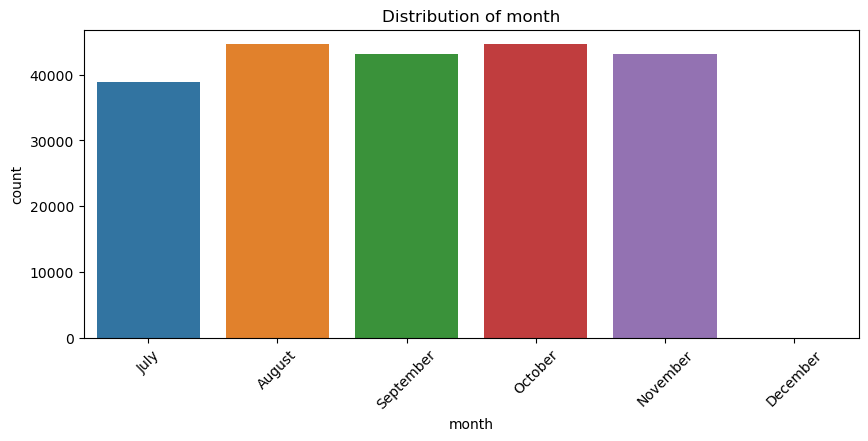

/Users/hassan/anaconda3/lib/python3.11/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


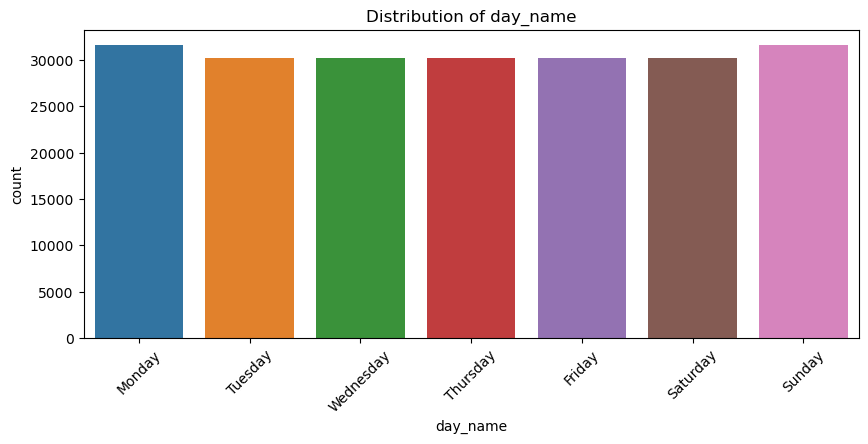

/Users/hassan/anaconda3/lib/python3.11/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


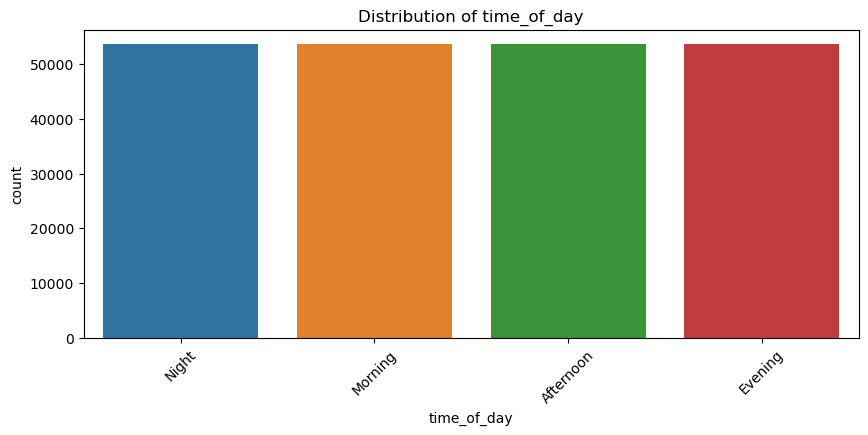

/Users/hassan/anaconda3/lib/python3.11/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


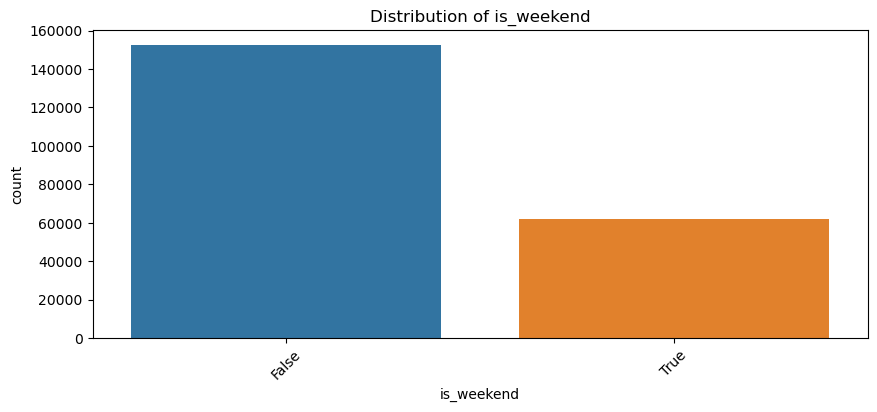

In [29]:
# Bar charts for each categorical variable
for column in cat_cols[1:]:
    plt.figure(figsize=(10, 4))
    sns.countplot(x=column, data=df)
    plt.title(f'Distribution of {column}')
    plt.xticks(rotation=45)
    plt.show()

### Numerical

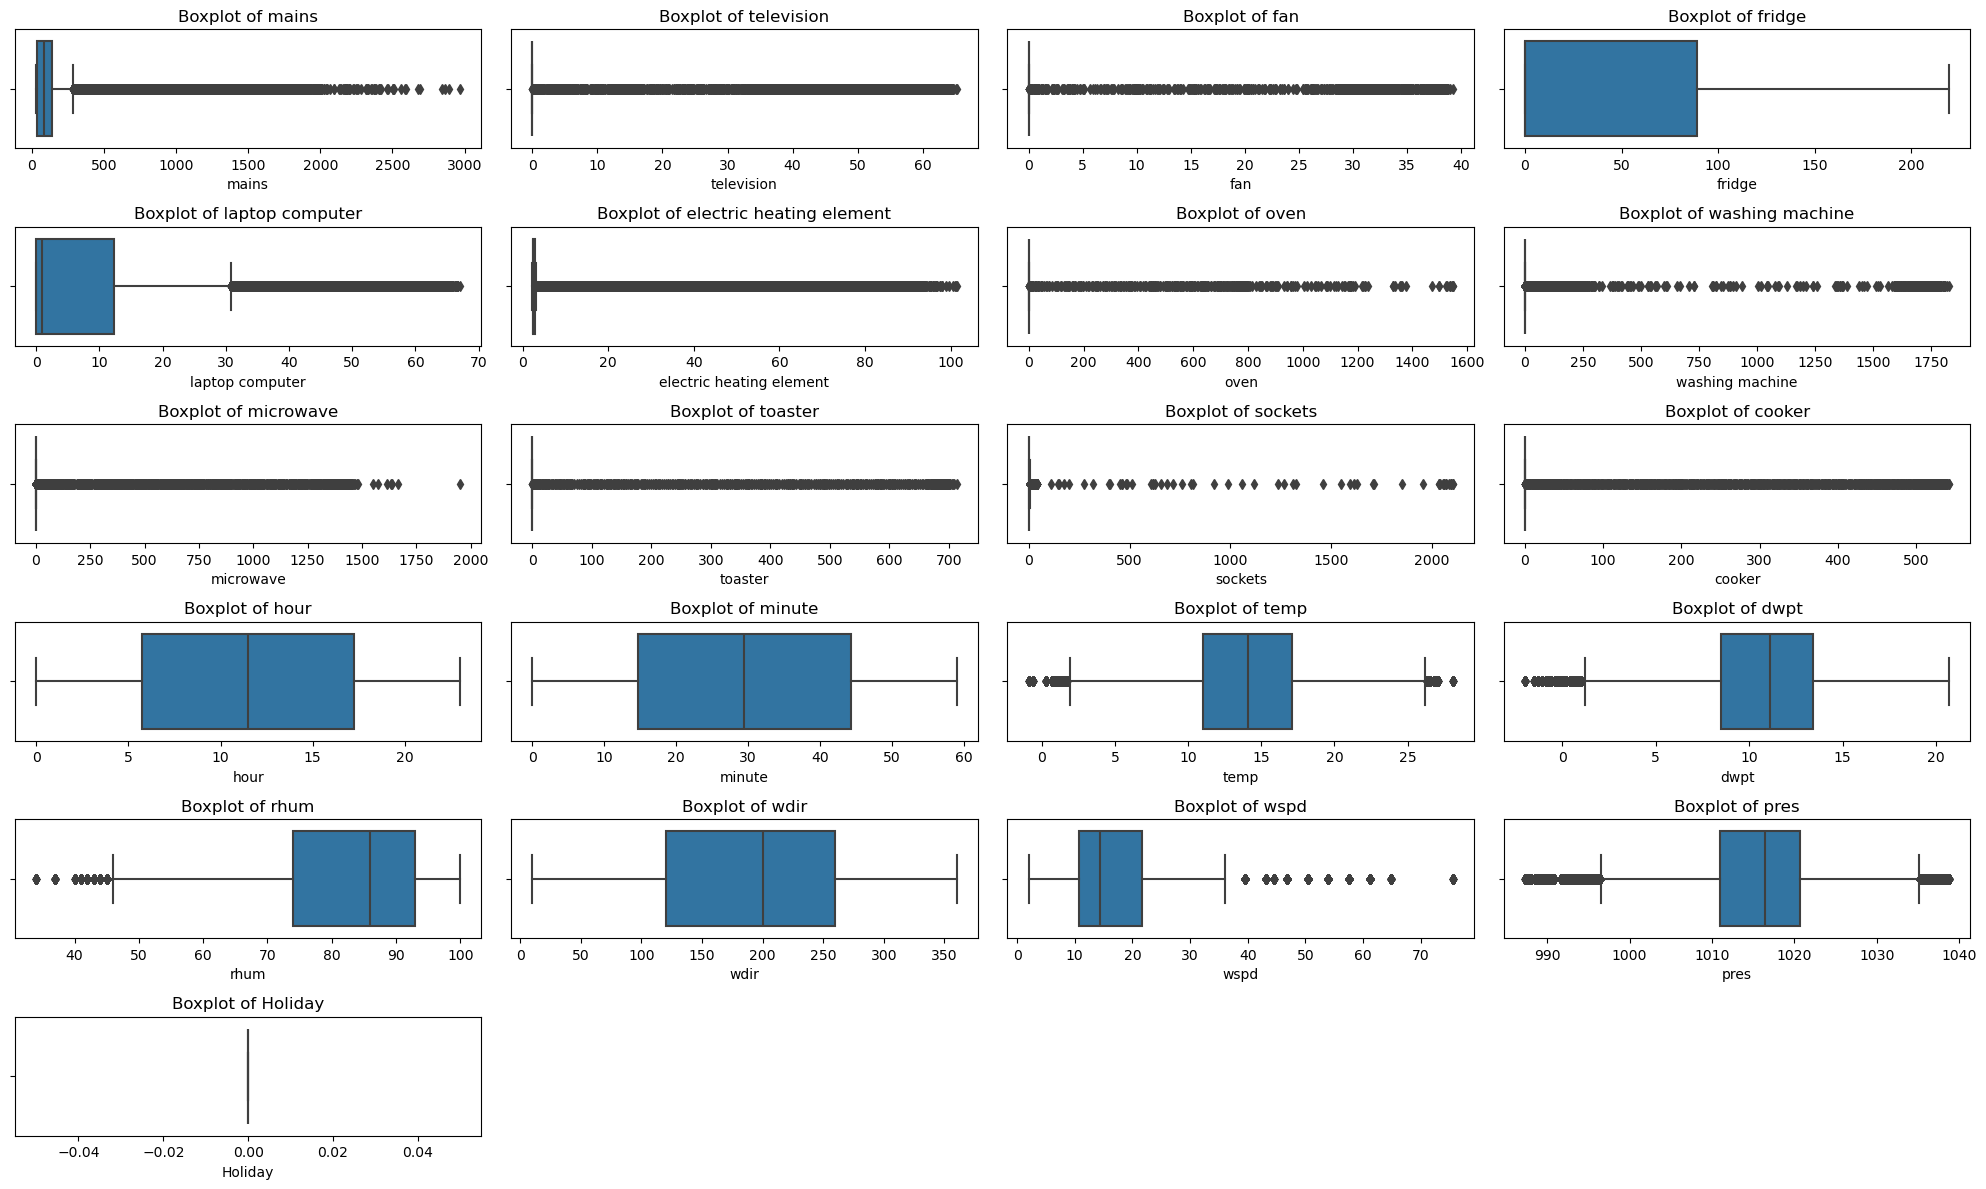

In [30]:
plt.figure(figsize=(20, 12))

# Loop through each numerical column and create a box plot in a subplot
for i, column in enumerate(num_cols):
    if column in df.columns:
        plt.subplot(6, 4, i + 1)  # Change the subplot layout based on your number of numerical columns
        sns.boxplot(x=df[column])
        plt.title(f'Boxplot of {column}')

plt.tight_layout()
plt.show()

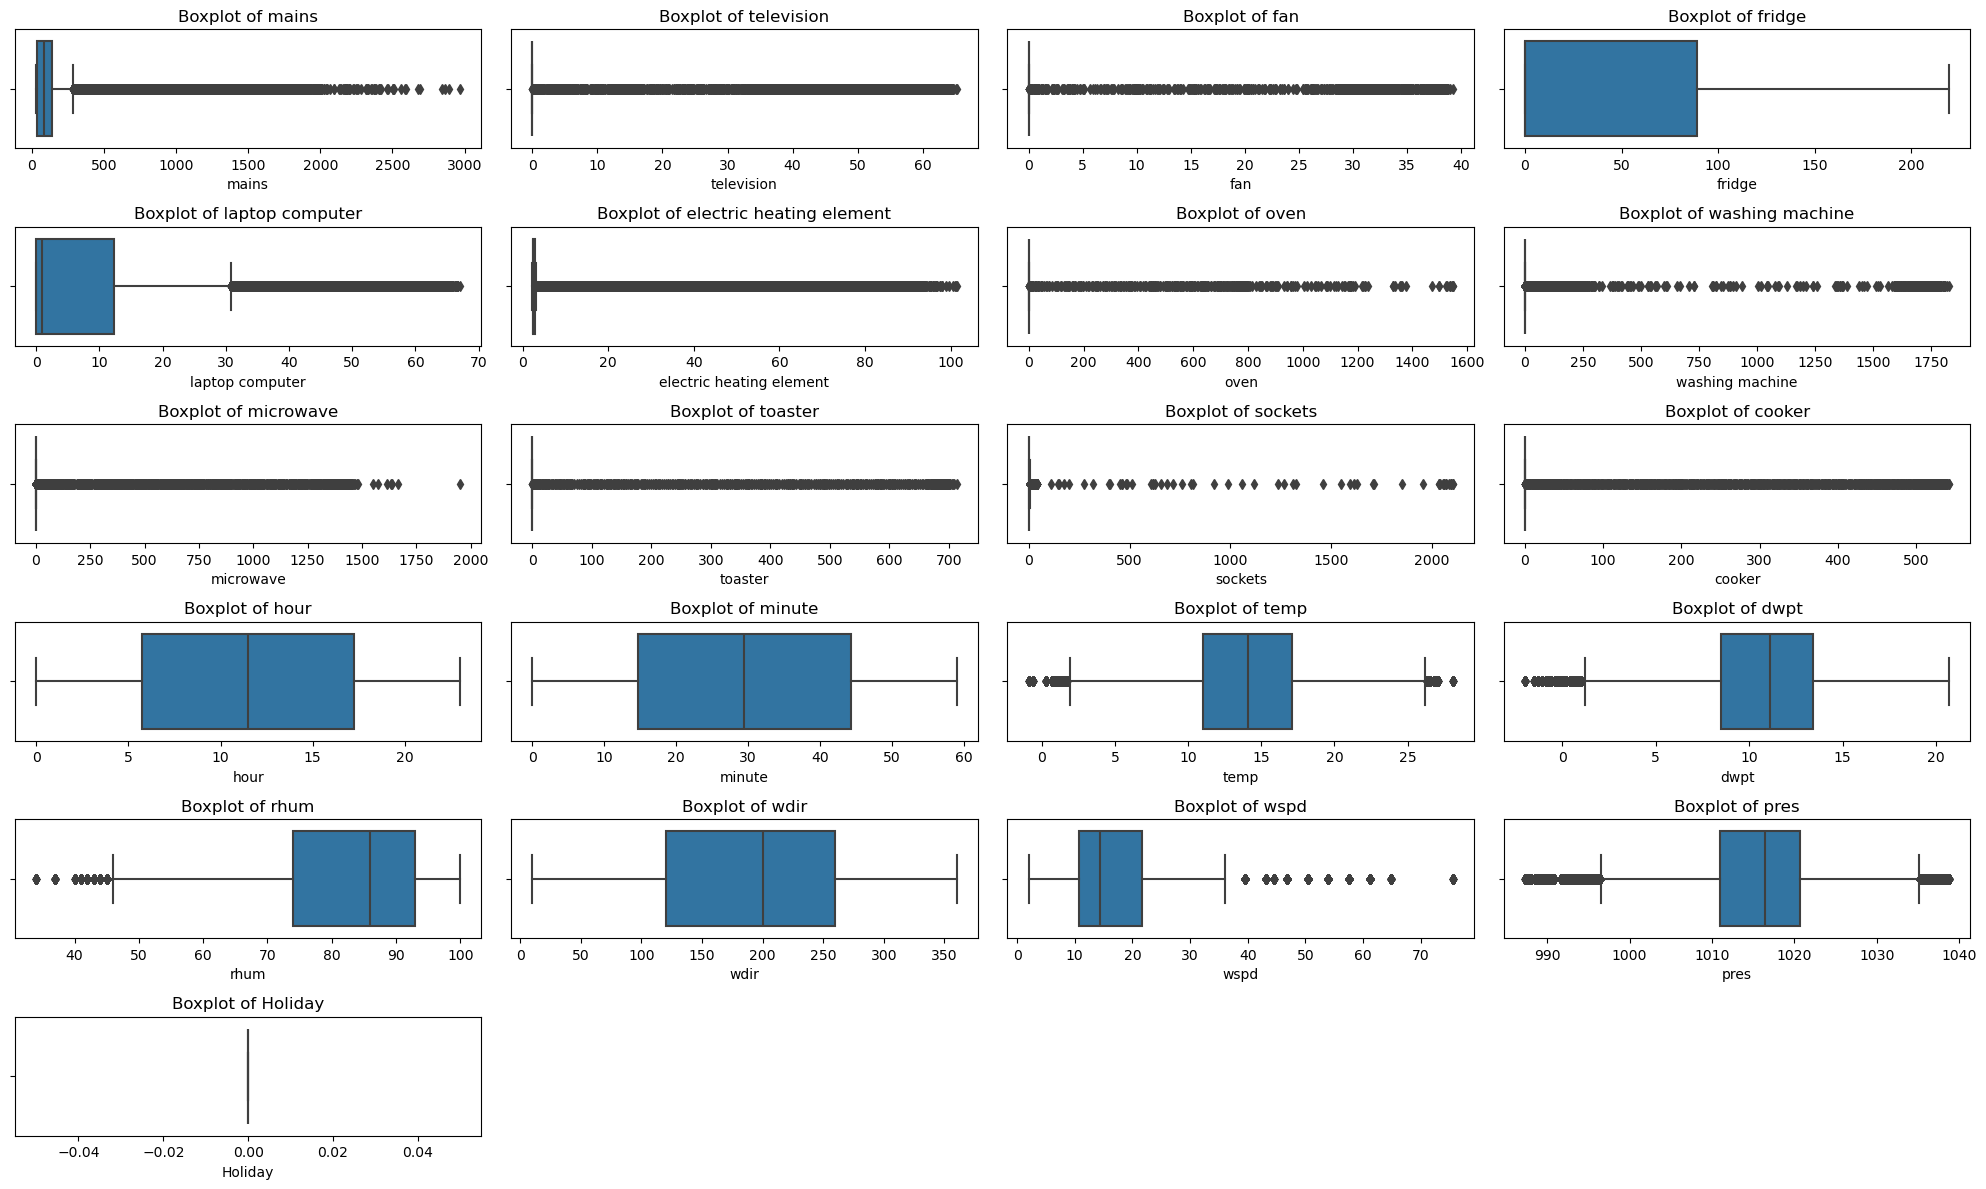

,Column,Outlier Percentage
0,mains,3.0
1,television,7.7
2,fan,4.4
3,fridge,0.0
4,laptop computer,7.5
5,electric heating element,20.6
6,oven,0.3
7,washing machine,1.8
8,microwave,16.9
9,toaster,0.2


In [31]:
# Create an empty dictionary to store outlier percentage for each column
outlier_dict = {}

plt.figure(figsize=(20, 12))

# Loop through each numerical column
for i, column in enumerate(num_cols):
    if column in df.columns:
        plt.subplot(6, 4, i + 1)  # Adjust layout as needed

        # Plot the boxplot for each numerical column
        sns.boxplot(x=df[column])
        plt.title(f'Boxplot of {column}')
        
        # Calculate the IQR and determine outliers
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        # Count the number of outliers
        outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
        outlier_count = outliers.shape[0]
        
        # Calculate the percentage of outliers
        total_count = df.shape[0]
        outlier_percentage = (outlier_count / total_count) * 100
        
        # Store the result in the dictionary
        outlier_dict[column] = outlier_percentage

plt.tight_layout()
plt.show()

# Convert the dictionary to a DataFrame for displaying the outlier percentages
outlier_df = pd.DataFrame(list(outlier_dict.items()), columns=['Column', 'Outlier Percentage'])
display(outlier_df.round(1))

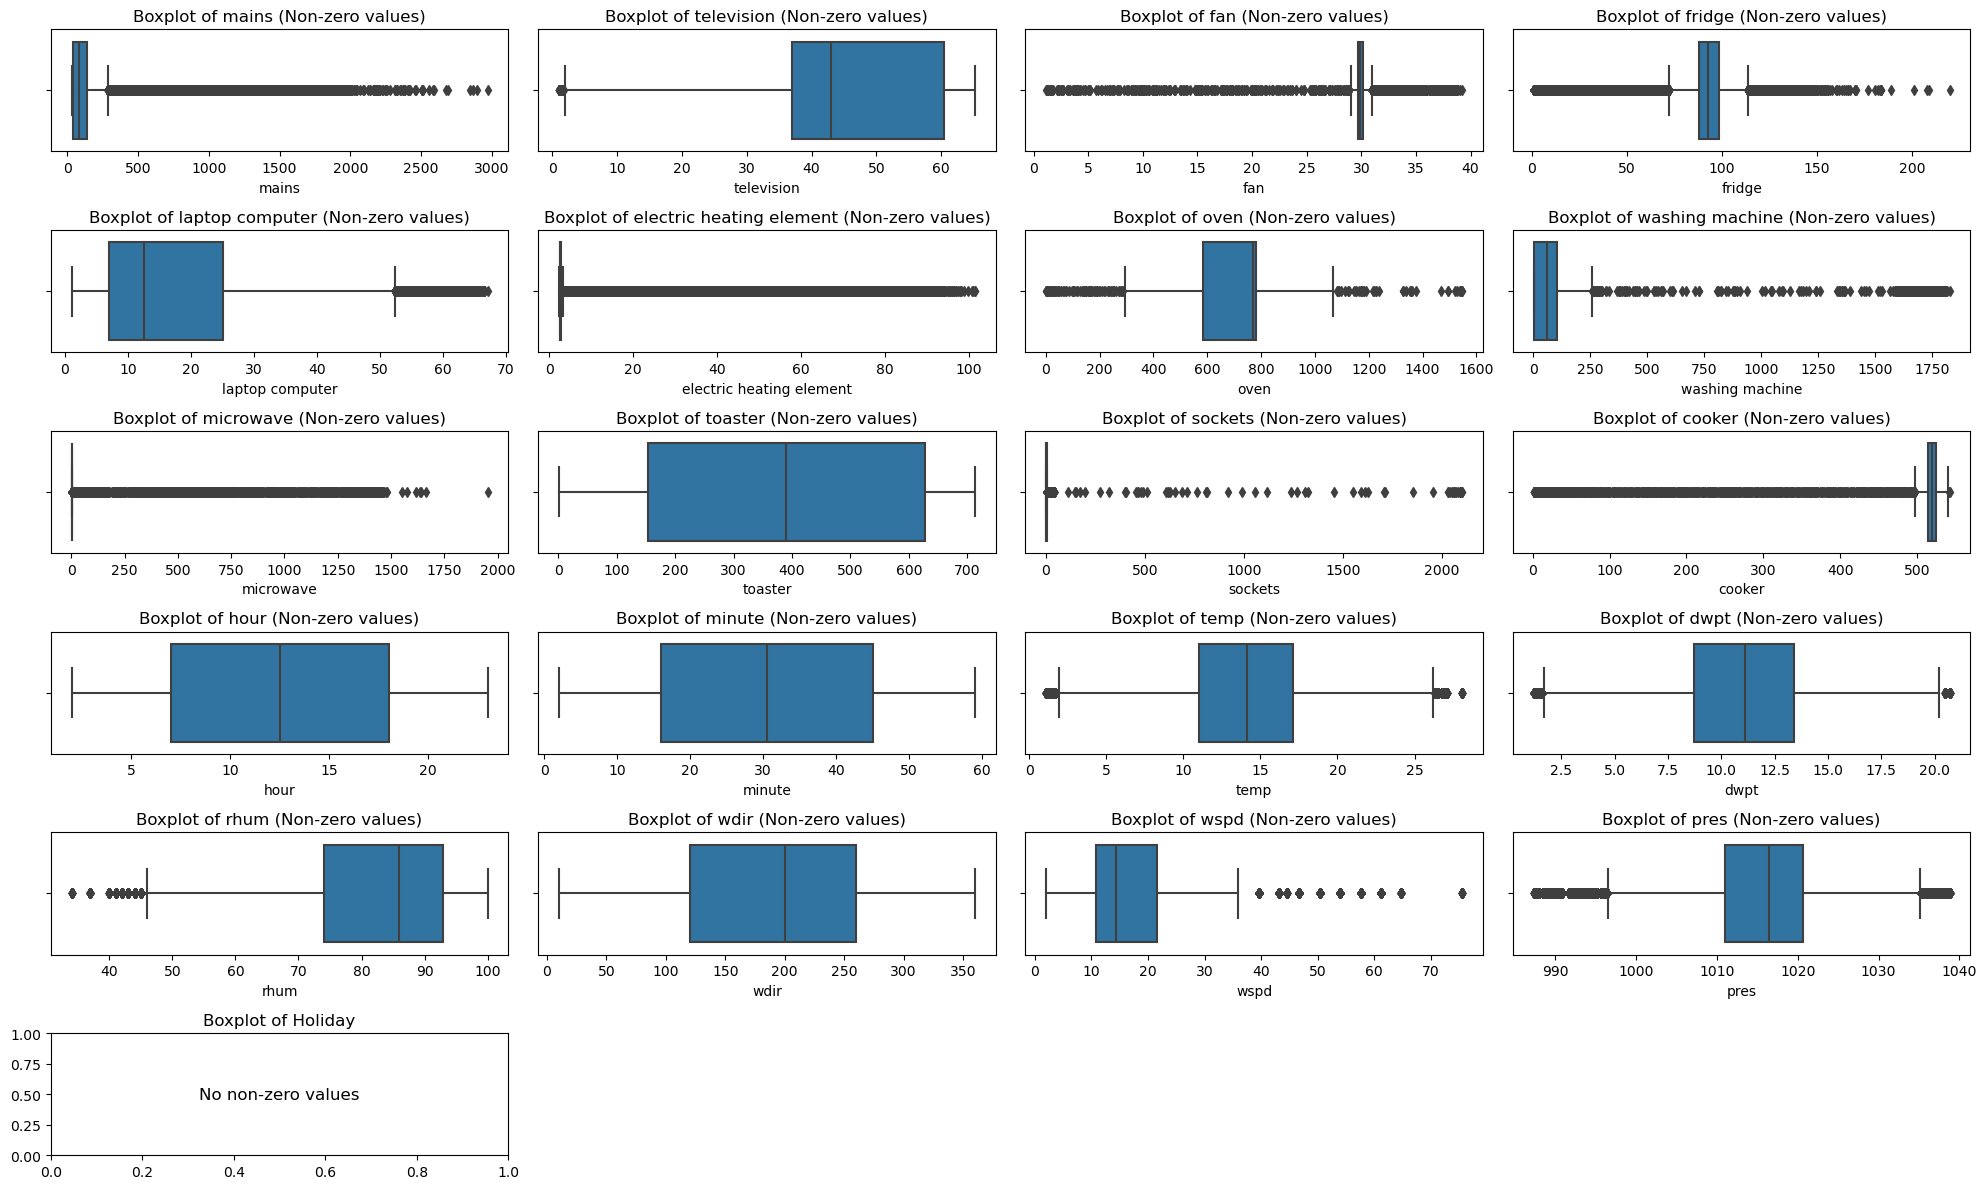

In [32]:
plt.figure(figsize=(20, 12))

# Loop through each numerical column and create a box plot in a subplot
for i, column in enumerate(num_cols):
    if column in df.columns:
        # Filter the data to include only values greater than 0
        non_zero_data = df[df[column] > 1][column]
        
        # Only plot if there are non-zero values to display
        if not non_zero_data.empty:
            plt.subplot(6, 4, i + 1)  # Change the subplot layout based on your number of numerical columns
            sns.boxplot(x=non_zero_data)
            plt.title(f'Boxplot of {column} (Non-zero values)')
        else:
            plt.subplot(6, 4, i + 1)
            plt.text(0.5, 0.5, 'No non-zero values', fontsize=12, ha='center', va='center')
            plt.title(f'Boxplot of {column}')

plt.tight_layout()
plt.show()

### Outliers Removal

In [33]:
# Function to remove high-range outliers based on specific columns
def remove_outliers(df, columns):
    for column in columns:
        if column in df.columns:
            # Calculate Q1 (25th percentile) and Q3 (75th percentile)
            Q1 = df[column].quantile(0.25)
            Q3 = df[column].quantile(0.75)
            IQR = Q3 - Q1  # Interquartile Range

            # Define the upper bound for detecting high-range outliers (we won't remove lower bound outliers)
            upper_bound = Q3 + 1.5 * IQR

            # Filter out the rows that contain high-range outliers (above upper bound)
            df = df[df[column] <= upper_bound]
    
    return df

# List of columns to remove outliers from (replace with your specific columns)
columns_to_clean = ['mains', 'wspd', 'temp','unknown']  # Replace with your actual column names

# Remove outliers from the specified columns
df_cleaned = remove_outliers(df, columns_to_clean)

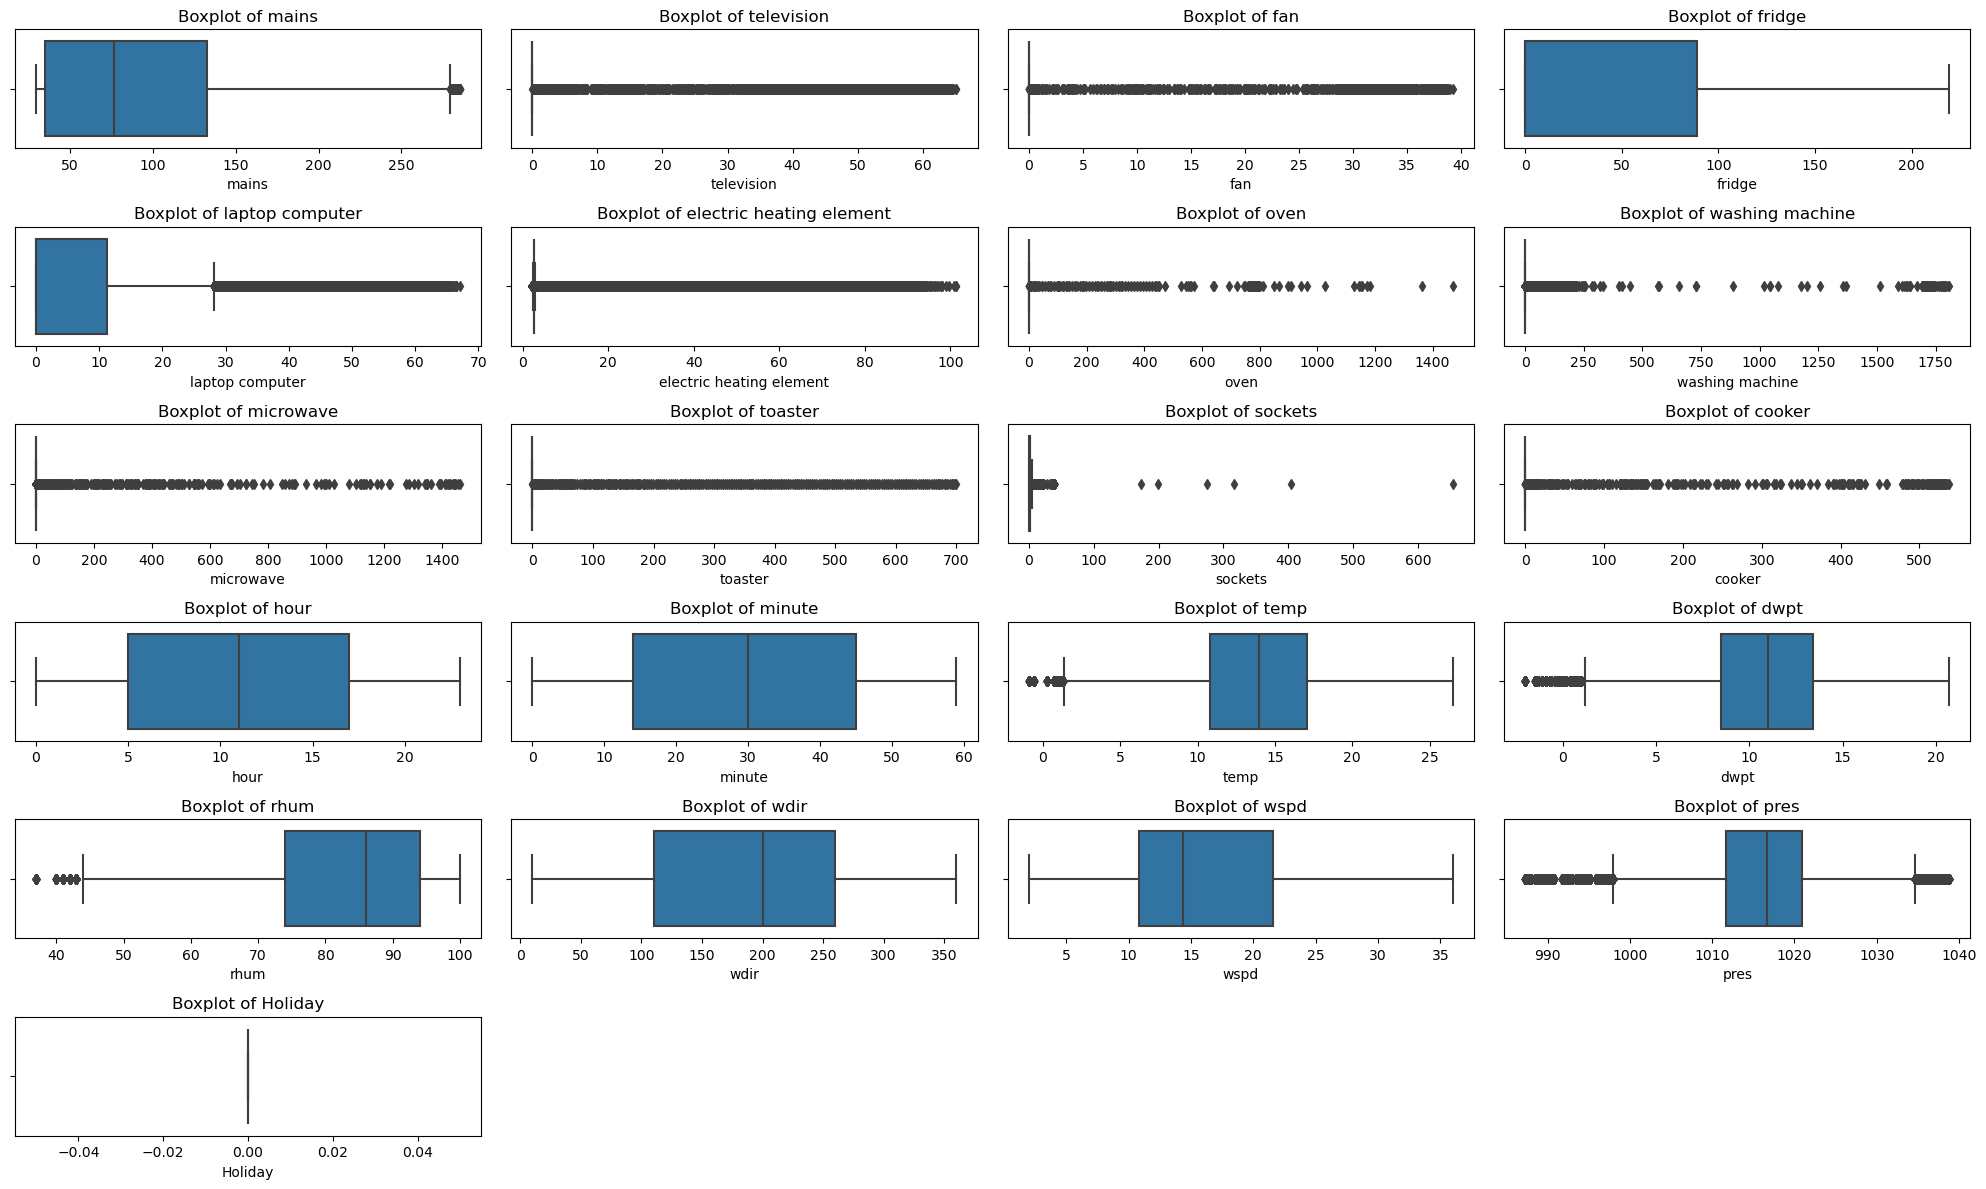

In [34]:
plt.figure(figsize=(20, 12))

# Loop through each numerical column and create a box plot in a subplot
for i, column in enumerate(num_cols):
    if column in df_cleaned.columns:
        plt.subplot(6, 4, i + 1)  # Change the subplot layout based on your number of numerical columns
        sns.boxplot(x=df_cleaned[column])
        plt.title(f'Boxplot of {column}')

plt.tight_layout()
plt.show()

In [35]:
# Function to compare the shape of two DataFrames and show the reduced rows and percentage
def compare_dataframes_shape(df_original, df_cleaned):
    # Get the original and cleaned number of rows
    original_rows = df_original.shape[0]
    cleaned_rows = df_cleaned.shape[0]

    # Calculate the reduced rows and percentage
    reduced_rows = original_rows - cleaned_rows
    reduced_percentage = (reduced_rows / original_rows) * 100

    # Create a comparison DataFrame
    comparison_df = pd.DataFrame({
        'Original Rows': [original_rows],
        'Cleaned Rows': [cleaned_rows],
        'Reduced Rows': [reduced_rows],
        'Reduced Percentage (%)': [reduced_percentage]
    })

    return comparison_df

# Assuming df is the original DataFrame and df_cleaned is the DataFrame after removing outliers
comparison_df = compare_dataframes_shape(df, df_cleaned)

comparison_df

,Original Rows,Cleaned Rows,Reduced Rows,Reduced Percentage (%)
0,214560,198100,16460,7.671514


In [36]:
#df = df_cleaned

### Energy Trends

/Users/hassan/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/hassan/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


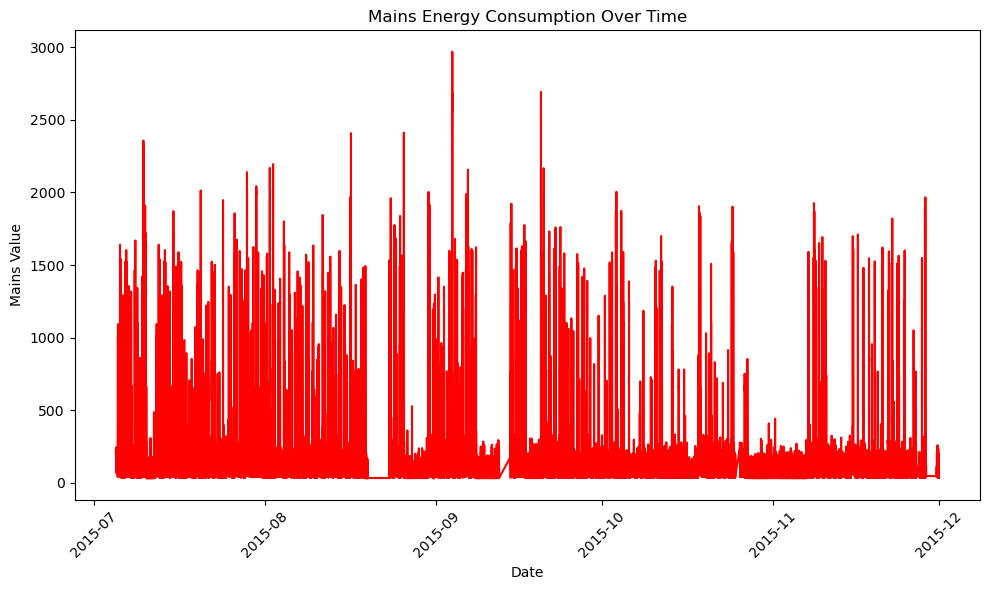

In [37]:
# Plot a line chart for the 'mains' column using seaborn
plt.figure(figsize=(10, 6))
sns.lineplot(x=df.Date, y='mains', data=df, color='red')

# Add titles and labels
plt.title('Mains Energy Consumption Over Time')
plt.xlabel('Date')
plt.ylabel('Mains Value')

# Rotate the x-axis labels for better readability
plt.xticks(rotation=45)

# Show the plot
plt.tight_layout()
plt.show()

In [38]:
# Select only the numerical columns for plotting
appliance_cols = ['television', 'fan', 'fridge', 'laptop computer',
       'electric heating element', 'oven', 'washing machine',
       'microwave', 'toaster', 'sockets', 'cooker']

# Create subplots with each variable in a different row
fig, axs = plt.subplots(len(appliance_cols), 1, figsize=(10, 1 * len(appliance_cols)), sharex=True)

# Loop through each numerical column and create a line plot in a different subplot
for i, col in enumerate(appliance_cols):
    axs[i].plot(df.Date, df[col], label=col, color='red')  # Customize the color as desired
    axs[i].set_title(f'{col} Line Plot')
    axs[i].set_ylabel(f'{col} Value')
    #axs[i].legend(loc='upper right')

# Set a common x-axis label
plt.xlabel('Date')

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plot
plt.show()

KeyboardInterrupt: 

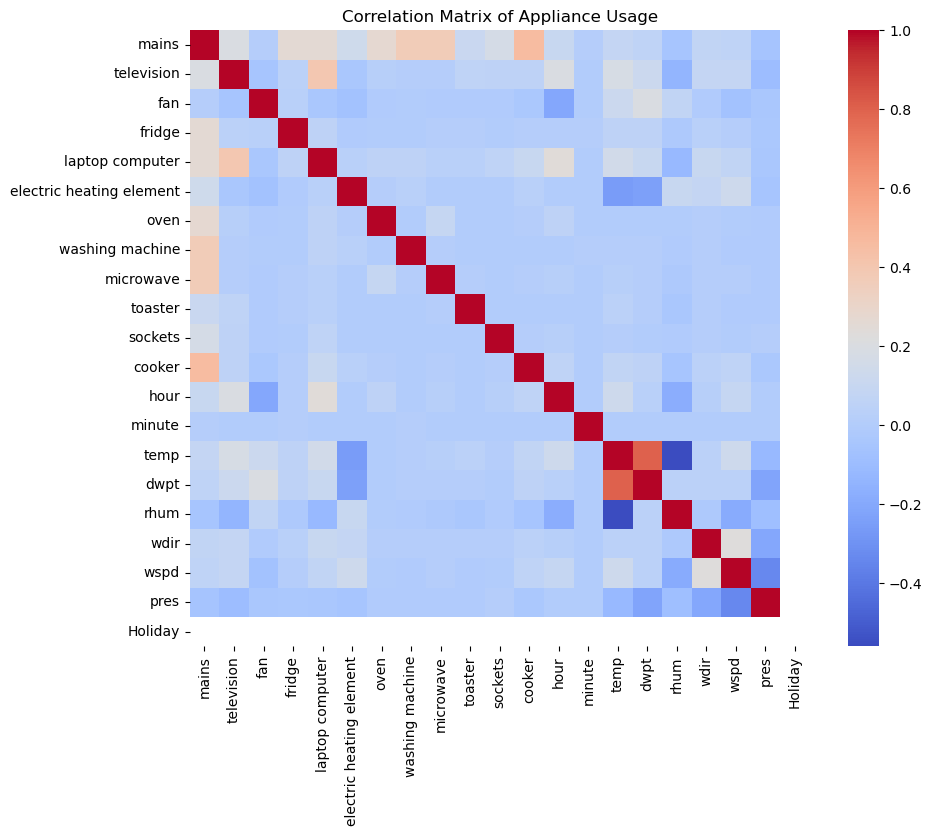

In [39]:
# Calculate correlation between the appliances
correlation_matrix = df[num_cols].corr().round(2)

# Plot heatmap to visualize the correlations
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm')
plt.title('Correlation Matrix of Appliance Usage')
plt.show()

## Scatter Plots

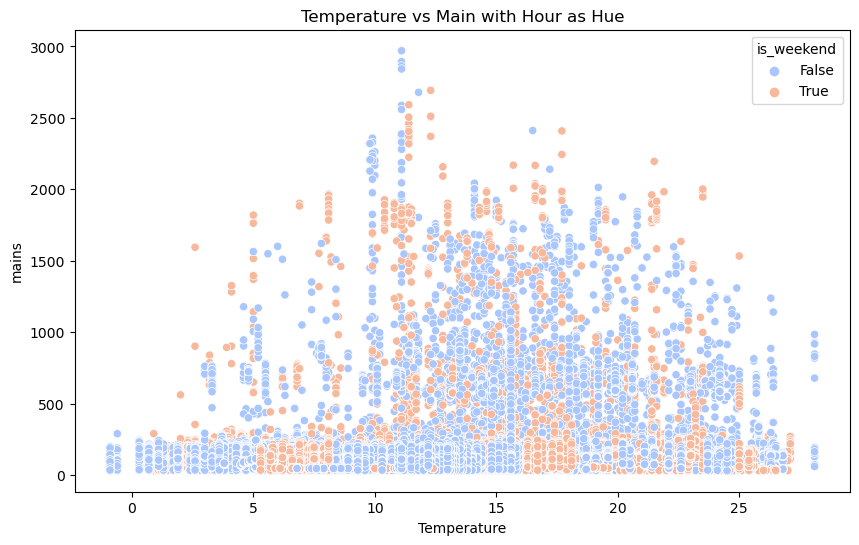

In [40]:
# Create the scatter plot with Temperature vs Main, using hour as the hue
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='temp', y='mains', hue='is_weekend', palette='coolwarm')

# Add labels and title
plt.xlabel('Temperature')
plt.ylabel('mains')
plt.title('Temperature vs Main with Hour as Hue')

# Display the plot
plt.show()

### Heatmap

/var/folders/lh/gk9hwg6n1w987hgh2bk78rb00000gn/T/ipykernel_47760/2300834611.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_heatmap = df.groupby('month')[appliance_cols].mean()


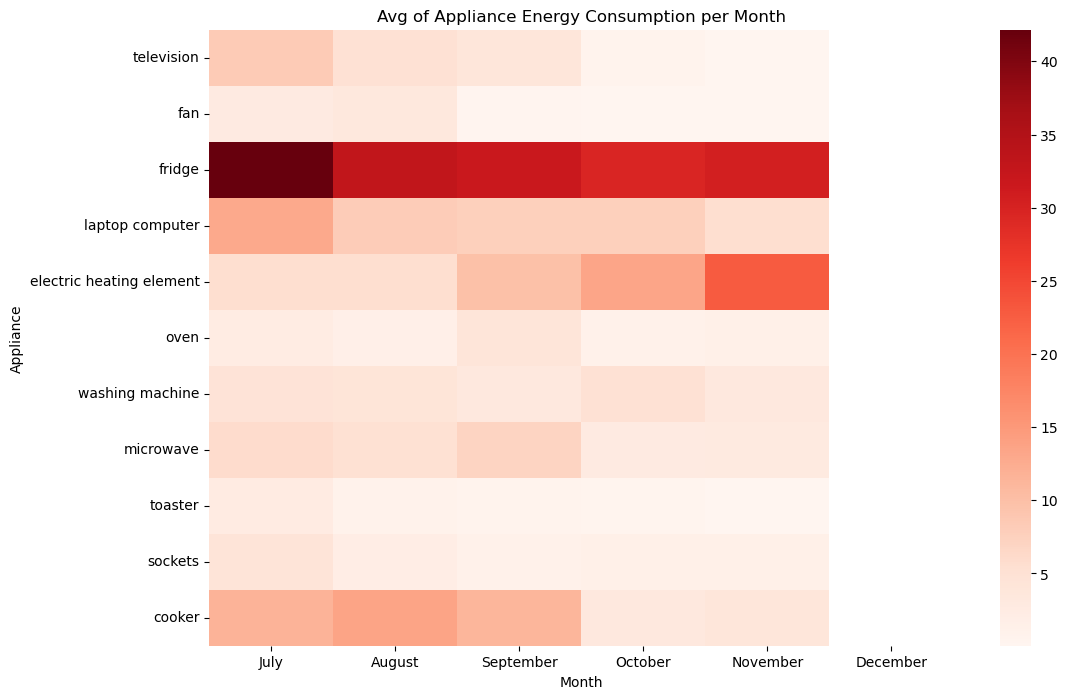

In [44]:
# Group by month and sum values for each appliance
df_heatmap = df.groupby('month')[appliance_cols].mean()

# Transpose the DataFrame so appliances are on the y-axis and months are on the x-axis
df_heatmap_t = df_heatmap.T

# Create a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(df_heatmap_t, cmap='Reds', annot=False, fmt='.1f')

# Add titles and labels
plt.title('Avg of Appliance Energy Consumption per Month')
plt.xlabel('Month')
plt.ylabel('Appliance')

# Show the plot
plt.show()

/var/folders/lh/gk9hwg6n1w987hgh2bk78rb00000gn/T/ipykernel_47760/3456719657.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_heatmap = df.groupby('time_of_day')[appliance_cols].mean()


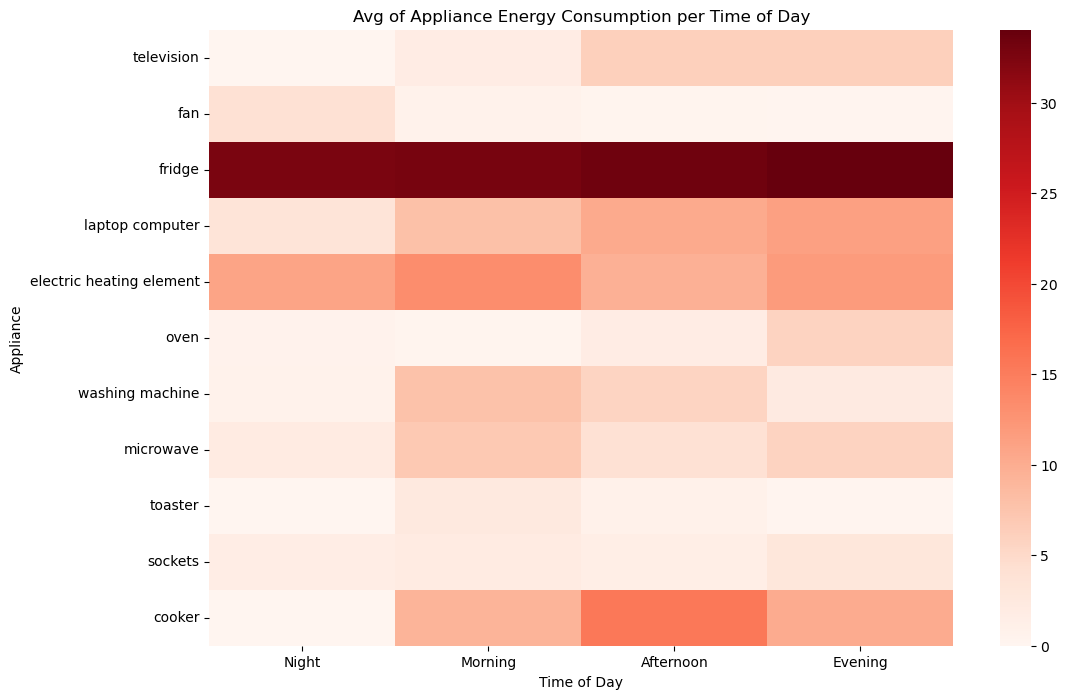

In [45]:
# Group by month and sum values for each appliance
df_heatmap = df.groupby('time_of_day')[appliance_cols].mean()

# Transpose the DataFrame so appliances are on the y-axis and months are on the x-axis
df_heatmap_t = df_heatmap.T

# Create a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(df_heatmap_t, cmap='Reds', annot=False, fmt='.1f')

# Add titles and labels
plt.title('Avg of Appliance Energy Consumption per Time of Day')
plt.xlabel('Time of Day')
plt.ylabel('Appliance')

# Show the plot
plt.show()

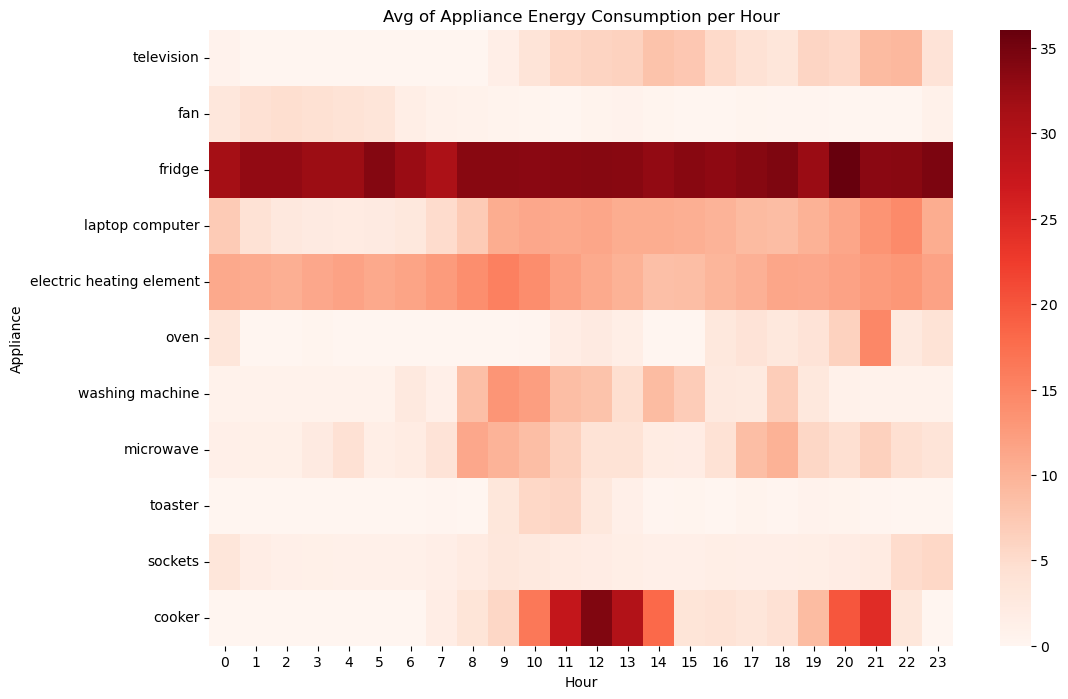

In [46]:
# Group by month and sum values for each appliance
df_heatmap = df.groupby('hour')[appliance_cols].mean()

# Transpose the DataFrame so appliances are on the y-axis and months are on the x-axis
df_heatmap_t = df_heatmap.T

# Create a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(df_heatmap_t, cmap='Reds', annot=False, fmt='.1f')

# Add titles and labels
plt.title('Avg of Appliance Energy Consumption per Hour')
plt.xlabel('Hour')
plt.ylabel('Appliance')

# Show the plot
plt.show()

### Clustering

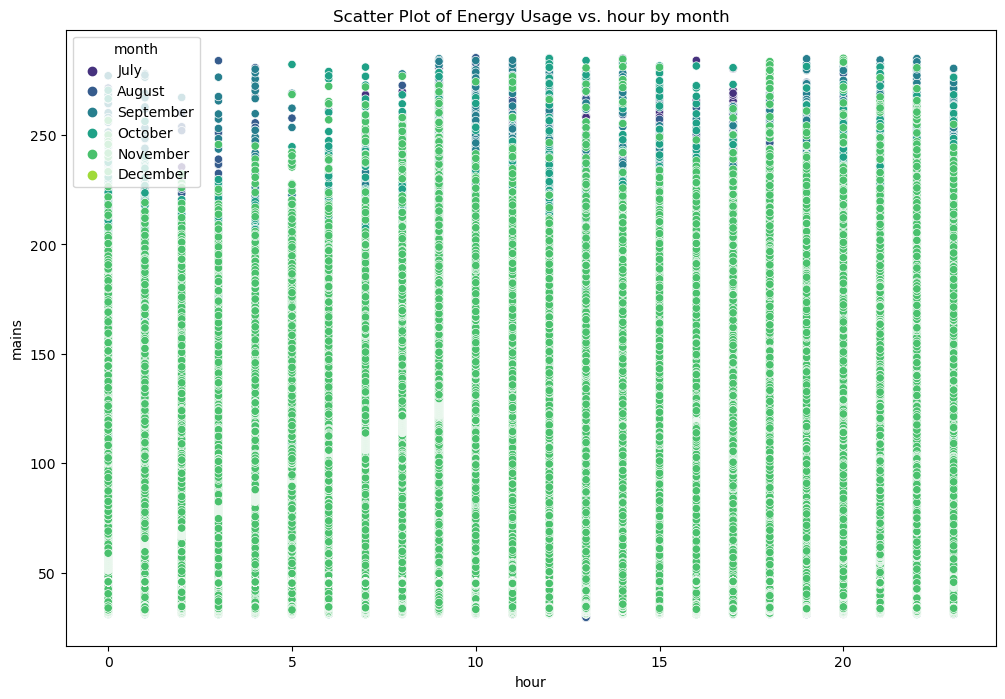

In [44]:
plt.figure(figsize=(12, 8))
scatter = sns.scatterplot(data=df, x='hour', y='mains', hue='month',
                          palette='viridis')  # Adjust size and palette as needed

plt.title('Scatter Plot of Energy Usage vs. hour by month')
plt.show()

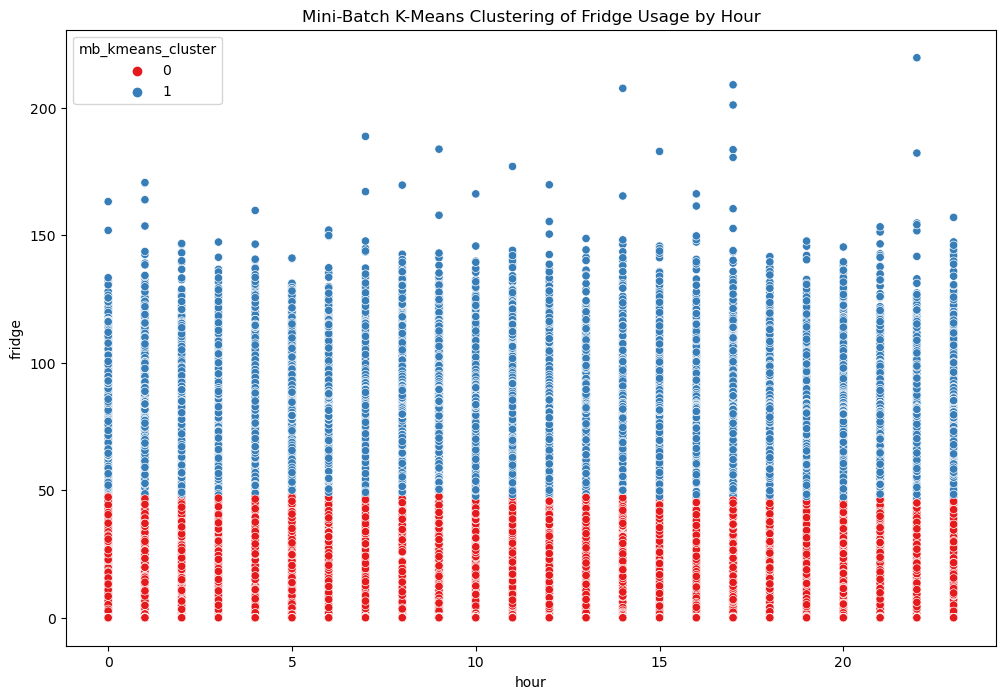

In [46]:
from sklearn.cluster import MiniBatchKMeans

# Apply Mini-Batch K-Means
mb_kmeans = MiniBatchKMeans(n_clusters=2, random_state=42, batch_size=200)
fridge_hour_df['mb_kmeans_cluster'] = mb_kmeans.fit_predict(fridge_hour_scaled)

# Visualize the Mini-Batch K-Means results
plt.figure(figsize=(12, 8))
sns.scatterplot(x='hour', y='fridge', hue='mb_kmeans_cluster', data=fridge_hour_df, palette='Set1')
plt.title('Mini-Batch K-Means Clustering of Fridge Usage by Hour')
plt.show()

## Outlier Detection

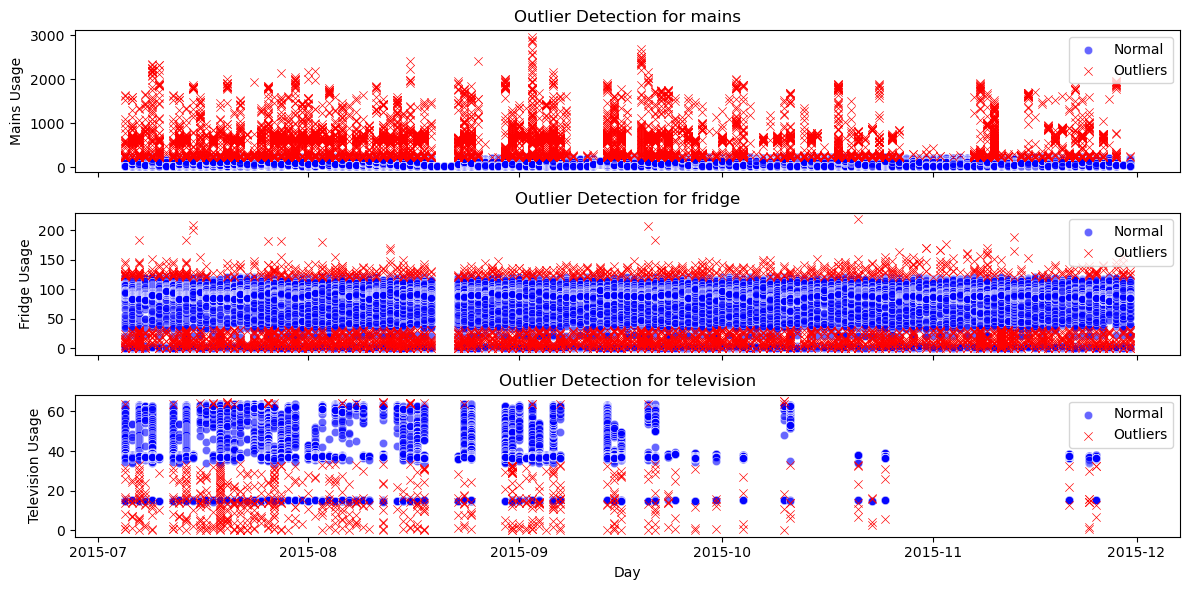

In [49]:
from sklearn.ensemble import IsolationForest
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Function to detect outliers for multiple columns
def detect_outliers(df, columns, contamination=0.05, random_state=42):
    for column in columns:
        # Drop missing values and filter out rows where the appliance usage is 0
        df_col = df[[column]].dropna()
        df_col = df_col[df_col[column] > 0]  # Optional: exclude zero values if necessary
        
        # Initialize Isolation Forest for the column
        iso_forest = IsolationForest(contamination=contamination, random_state=random_state)
        iso_forest.fit(df_col)
        
        # Predict anomalies (outliers = -1, normal = 1)
        df_col['anomaly'] = iso_forest.predict(df_col)
        
        # Add the outlier column back to the original dataframe
        df[f'{column}_outlier'] = np.nan
        df.loc[df_col.index, f'{column}_outlier'] = (df_col['anomaly'] == -1).astype(int)
    
    return df

# Function to visualize the outliers for multiple columns
def visualize_outliers_multi(df, columns, x_axis='hour'):
    num_cols = len(columns)
    
    # Create subplots, one row per column, sharing the x-axis
    fig, axes = plt.subplots(nrows=num_cols, ncols=1, figsize=(12, 2 * num_cols), sharex=True)

    for i, column in enumerate(columns):
        # Check if outlier column exists
        if f'{column}_outlier' not in df.columns:
            print(f"Outlier column '{column}_outlier' not found. Please run outlier detection first.")
            continue
        
        # Select the current axis (row)
        ax = axes[i]

        # Separate outliers and inliers
        outliers = df[df[f'{column}_outlier'] == 1]
        inliers = df[df[f'{column}_outlier'] == 0]

        # Plot inliers and outliers
        sns.scatterplot(x=df.loc[inliers.index, x_axis], y=inliers[column], ax=ax, label='Normal', color='blue', alpha=0.6)
        sns.scatterplot(x=df.loc[outliers.index, x_axis], y=outliers[column], ax=ax, label='Outliers', color='red', marker='x')

        # Set title and labels for the current plot
        ax.set_title(f'Outlier Detection for {column}')
        ax.set_ylabel(f'{column.capitalize()} Usage')

    # Set the x-axis label once, shared by all plots
    axes[-1].set_xlabel(f'{x_axis.capitalize()}')

    # Adjust layout
    plt.tight_layout()
    plt.show()

# Example usage
appliance_cols = ['mains', 'fridge', 'television']  # Columns for multiple appliances
df = detect_outliers(df, appliance_cols)  # Detect outliers for multiple appliances
visualize_outliers_multi(df, appliance_cols, x_axis='day')  # Visualize them side by side

### Resample to hours

In [41]:
df_copy = df.copy()
# Ensure the 'Date' or 'Time' column is in datetime format
#df['Date'] = pd.to_datetime(df['Date'])

# Set the 'Date' or 'Time' column as the index
df_copy.set_index('Date', inplace=True)

# Separate numerical and categorical columns
numerical_cols = df_copy.select_dtypes(include=['number']).columns
categorical_cols = df_copy.select_dtypes(include=['category', 'object']).columns

# Resample numerical columns with 'mean'
df_numerical_resampled = df_copy[numerical_cols].resample('h').mean()

# Resample categorical columns using 'mode' or 'first'
df_categorical_resampled = df_copy[categorical_cols].resample('h').agg(lambda x: x.mode().iloc[0] if not x.mode().empty else x.iloc[0])

# Combine both numerical and categorical resampled DataFrames
df_hourly = pd.concat([df_numerical_resampled, df_categorical_resampled], axis=1)

# Reset the index if you want 'Date' back as a column (optional)
df_hourly.reset_index(inplace=True)

# Display the resampled hourly DataFrame
df_hourly.head()


,Date,mains,television,fan,fridge,laptop computer,electric heating element,oven,washing machine,microwave,...,rhum,wdir,wspd,pres,Holiday,day,month,day_name,time_of_day,is_weekend
0,2015-07-05 00:00:00,143.147376,0.0,29.65,46.328100,28.574376,3.305372,0.0,0.68,1.24,...,82.0,220.0,7.2,1020.1,0.0,2015-07-05,July,Sunday,Night,True
1,2015-07-05 01:00:00,137.715056,0.0,29.65,67.477149,6.903596,3.567010,0.0,0.68,1.24,...,83.0,210.0,7.2,1020.0,0.0,2015-07-05,July,Sunday,Night,True
2,2015-07-05 02:00:00,96.905917,0.0,29.65,27.872019,7.256528,3.493292,0.0,0.68,1.24,...,85.0,150.0,7.2,1019.5,0.0,2015-07-05,July,Sunday,Night,True
3,2015-07-05 03:00:00,158.304917,0.0,29.65,87.796758,7.203779,3.180235,0.0,0.68,1.24,...,86.0,210.0,7.2,1019.5,0.0,2015-07-05,July,Sunday,Night,True
4,2015-07-05 04:00:00,81.829944,0.0,29.65,13.002829,6.871206,2.550000,0.0,0.68,1.24,...,84.0,180.0,3.6,1018.9,0.0,2015-07-05,July,Sunday,Night,True


/var/folders/lh/gk9hwg6n1w987hgh2bk78rb00000gn/T/ipykernel_47760/1651856399.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_grouped = df.groupby(['day','day_name','month', 'hour','time_of_day']).agg({


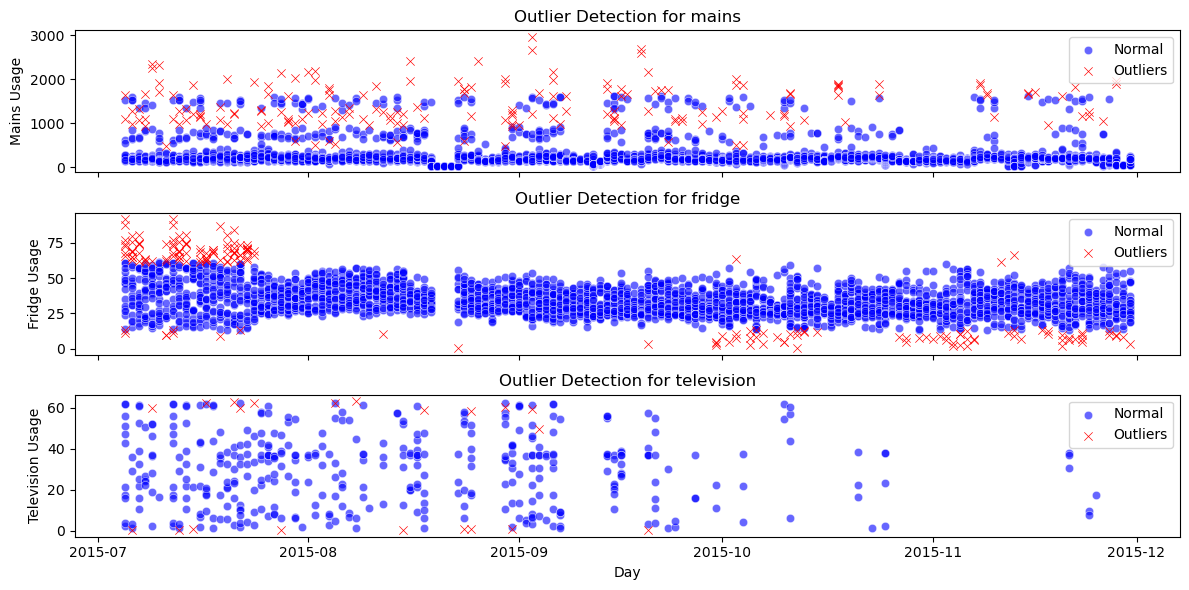

In [51]:
# Group by 'day' and 'hour'
df_grouped = df.groupby(['day','day_name','month', 'hour','time_of_day']).agg({
    'mains': 'max',        # You can choose 'sum', 'mean', or any other aggregation function
    'fridge': 'mean',
    'television': 'mean',
    'temp': 'mean',
    'wspd': 'mean',
    # Add other columns or appliances as needed
}).reset_index()

# Display the grouped dataframe
df_grouped.head()

# Example usage
appliance_cols = ['mains', 'fridge', 'television']  # Columns for multiple appliances
df_grouped = detect_outliers(df_grouped, appliance_cols)  # Detect outliers for multiple appliances
visualize_outliers_multi(df_grouped, appliance_cols, x_axis='day')  # Visualize them side by side

## monthly bill prediction 

### Nov Test, rest training

In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import make_scorer, mean_absolute_error, r2_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Global settings
max_iter = 20  # Maximum number of iterations for RandomizedSearchCV
cv_folds = 5  # Number of cross-validation folds

# Function to calculate Mean Absolute Percentage Error (MAPE)
def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

# Define MAPE scorer for RandomizedSearchCV
mape_scorer = make_scorer(mean_absolute_percentage_error, greater_is_better=False)

# Function to plot actual vs predicted values for both train and test sets
def plot_train_vs_test(y_train, y_train_pred, y_test, y_test_pred, model_name):
    plt.figure(figsize=(12, 6))

    # Plot for training set
    plt.subplot(1, 2, 1)
    plt.scatter(y_train, y_train_pred, alpha=0.5, color="blue", label="Predicted vs Actual")
    plt.plot([min(y_train), max(y_train)], [min(y_train), max(y_train)], color="red", linestyle="--", label="Perfect Fit (y=x)")
    plt.xlabel("Actual")
    plt.ylabel("Predicted")
    plt.title(f"Train: Actual vs Predicted ({model_name})")
    plt.legend()

    # Plot for test set
    plt.subplot(1, 2, 2)
    plt.scatter(y_test, y_test_pred, alpha=0.5, color="green", label="Predicted vs Actual")
    plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color="red", linestyle="--", label="Perfect Fit (y=x)")
    plt.xlabel("Actual")
    plt.ylabel("Predicted")
    plt.title(f"Test: Actual vs Predicted ({model_name})")
    plt.legend()

    plt.tight_layout()
    plt.show()

# Function to prepare the data with preprocessing (OneHotEncoding, Scaling)
def prepare_data(df, target_column, feature_columns=None, train_months=None, test_months=None):
    if train_months is None or test_months is None:
        raise ValueError("Please provide valid lists of months for training and testing.")

    # Filter data for training and testing based on the months provided
    train_data = df[df['month'].isin(train_months)]
    test_data = df[df['month'].isin(test_months)]

    # Reset indices
    train_data = train_data.reset_index(drop=True)
    test_data = test_data.reset_index(drop=True)

    # Prepare the features (X) and target (y)
    X_train = train_data[feature_columns]
    y_train = train_data[target_column].values

    X_test = test_data[feature_columns]
    y_test = test_data[target_column].values

    # Define categorical and numerical columns
    categorical_cols = X_train.select_dtypes(include=['object', 'category']).columns.tolist()
    numerical_cols = X_train.select_dtypes(include=['number']).columns.tolist()

    # Create a preprocessor pipeline
    preprocessor = ColumnTransformer(
        transformers=[
            ('num', StandardScaler(), numerical_cols),   # Scale numerical features
            ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols)   # One-hot encode categorical features, ignoring unknown categories
        ]
    )

    # Apply transformations to the training and testing data
    X_train_preprocessed = preprocessor.fit_transform(X_train)
    X_test_preprocessed = preprocessor.transform(X_test)

    return X_train_preprocessed, y_train, X_test_preprocessed, y_test, train_data, test_data

# Function to evaluate models using RandomizedSearchCV for hyperparameter optimization
def evaluate_models(X_train, y_train, X_test, y_test):
    # Initialize base regression models and hyperparameter search space
    models = {
        'Linear Regression': {
            'model': LinearRegression(),
            'params': None  # No hyperparameter tuning for LinearRegression
        },
        'Random Forest': {
            'model': RandomForestRegressor(random_state=42),
            'params': {
                'n_estimators': [50, 100, 200, 300],
                'max_depth': [5, 10, 20, 30],
                'min_samples_split': [2, 5, 10],
                'min_samples_leaf': [1, 2, 5]
            }
        },
        'XGBoost': {
            'model': XGBRegressor(random_state=42),
            'params': {
                'n_estimators': [50, 100, 200, 300],
                'max_depth': [3, 5, 7, 10],
                'learning_rate': [0.01, 0.1, 0.3],
                'min_child_weight': [1, 5, 10],
                'subsample': [0.5, 0.7, 1.0],
                'colsample_bytree': [0.5, 0.7, 1.0]
            }
        },
        #'Neural Network (MLP)': {
        #    'model': MLPRegressor(random_state=42),
        #    'params': {
        #        'hidden_layer_sizes': [(50,), (100,), (50, 50), (100, 50)],
        #        'activation': ['relu', 'tanh'],
        #        'learning_rate_init': [0.001, 0.01, 0.1],
        #        'solver': ['adam', 'lbfgs']
        #    }
        #}
    }

    # List to store the results for each model
    results = []

    # Loop through models and perform training and evaluation
    for model_name, model_info in models.items():
        model = model_info['model']
        params = model_info['params']

        if params is not None:
            # If hyperparameters are provided, use RandomizedSearchCV
            optimizer = RandomizedSearchCV(model, params, n_iter=max_iter, cv=cv_folds, random_state=42, scoring='r2', n_jobs=-1) #mape_scorer
            optimizer.fit(X_train, y_train)
            best_model = optimizer.best_estimator_
        else:
            # No hyperparameter tuning (e.g., LinearRegression)
            best_model = model
            best_model.fit(X_train, y_train)

        # Predict on train and test sets
        y_train_pred = best_model.predict(X_train)
        y_test_pred = best_model.predict(X_test)

        # Plot actual vs predicted for both train and test sets
        plot_train_vs_test(y_train, y_train_pred, y_test, y_test_pred, model_name)

        # Calculate evaluation metrics for train set
        mae_train = mean_absolute_error(y_train, y_train_pred)
        mape_train = mean_absolute_percentage_error(y_train, y_train_pred)
        r2_train = r2_score(y_train, y_train_pred)

        # Calculate evaluation metrics for test set
        mae_test = mean_absolute_error(y_test, y_test_pred)
        mape_test = mean_absolute_percentage_error(y_test, y_test_pred)
        r2_test = r2_score(y_test, y_test_pred)

        # Store the results in a dictionary for both train and test sets
        results.append({
            'Model': model_name,
            'Train_MAE': mae_train,
            'Train_MAPE (%)': mape_train,
            'Train_R2': r2_train,
            'Test_MAE': mae_test,
            'Test_MAPE (%)': mape_test,
            'Test_R2': r2_test
        })

    # Convert the results list into a DataFrame
    ML_result_df = pd.DataFrame(results)

    return ML_result_df



In [42]:
df.columns

Index(['mains', 'television', 'fan', 'fridge', 'laptop computer',
       'electric heating element', 'oven', 'washing machine', 'microwave',
       'toaster', 'sockets', 'cooker', 'day', 'month', 'day_name', 'hour',
       'minute', 'time_of_day', 'is_weekend', 'temp', 'dwpt', 'rhum', 'wdir',
       'wspd', 'pres', 'Holiday', 'mains_outlier', 'fridge_outlier',
       'television_outlier'],
      dtype='object')

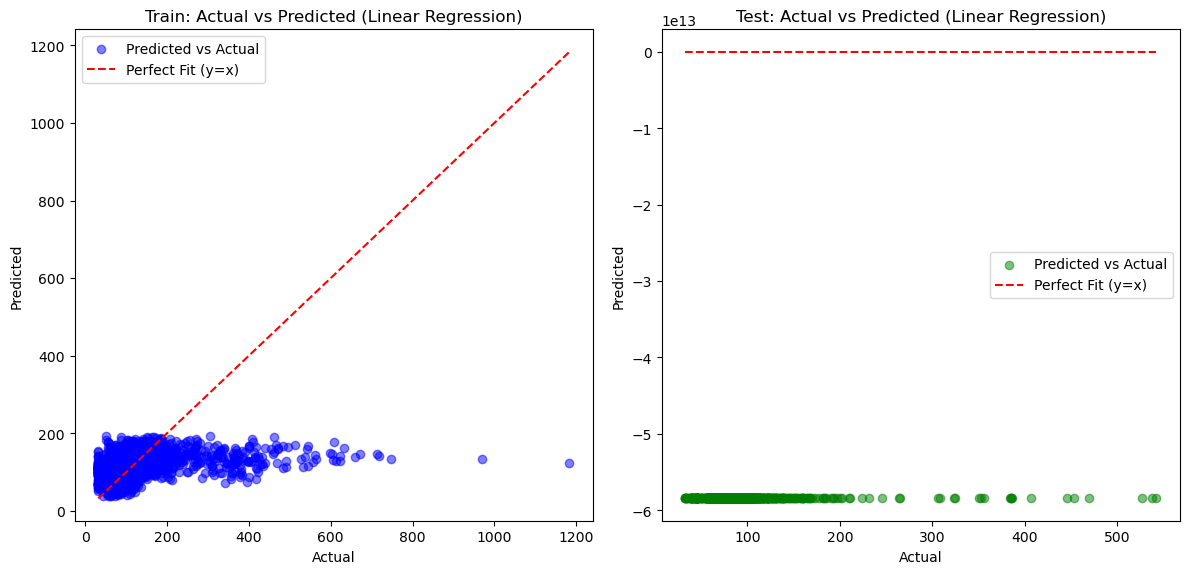

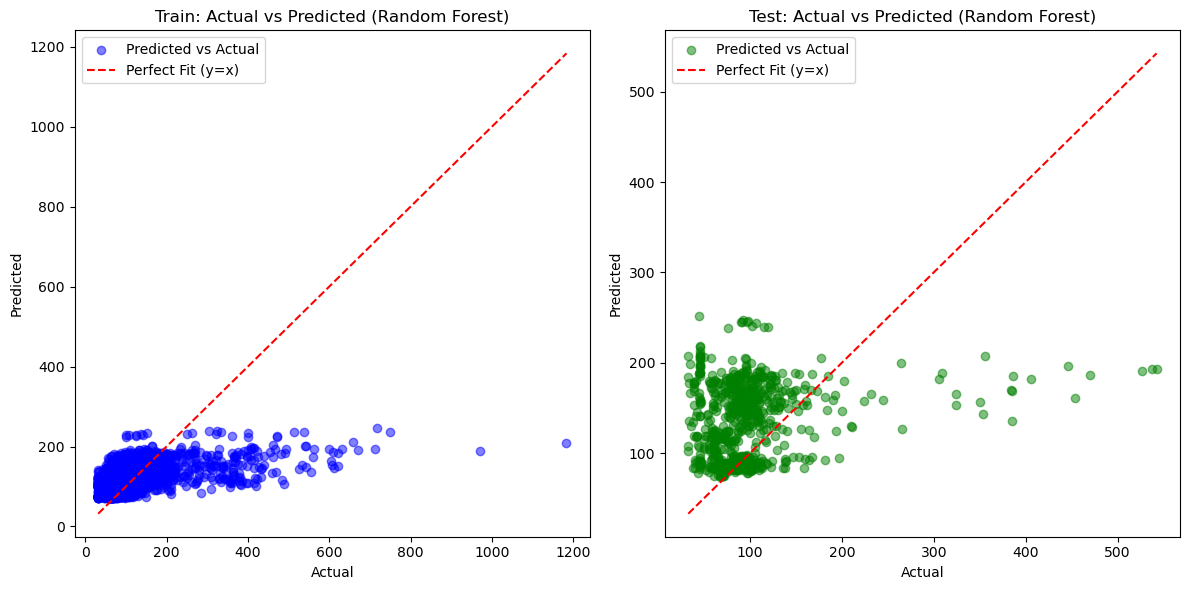

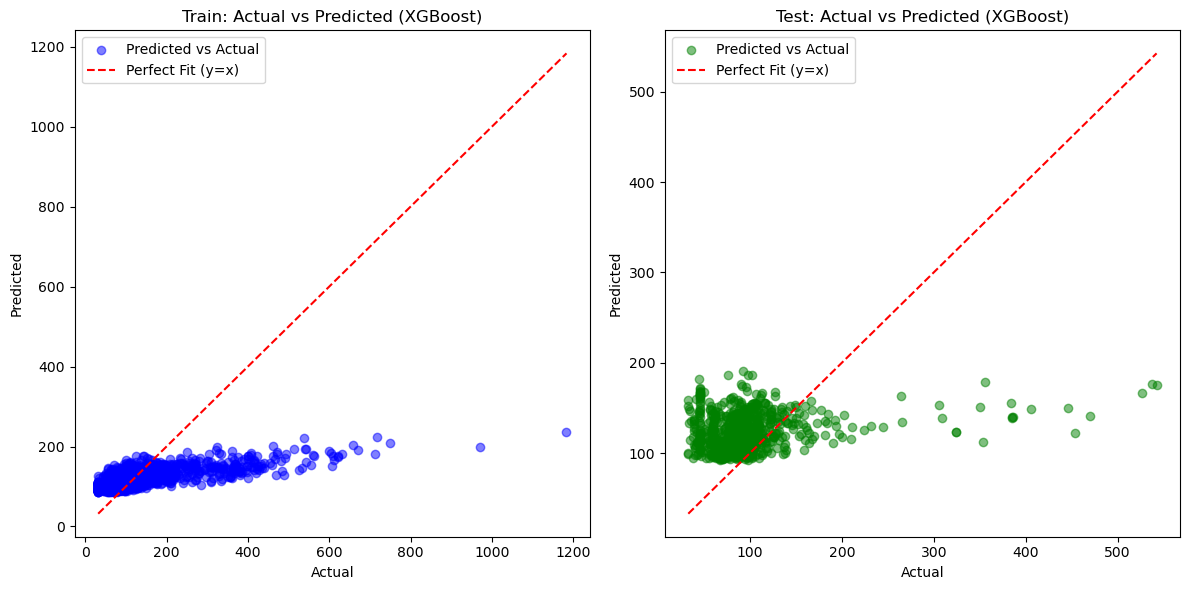

,Model,Train_MAE,Train_MAPE (%),Train_R2,Test_MAE,Test_MAPE (%),Test_R2
0,Linear Regression,48.552201,47.185947,0.112104,5.845560e+13,7.301218e+13,-9.424594e+23
1,Random Forest,43.037868,41.676860,0.258174,5.611845e+01,7.402473e+01,-5.579596e-01
2,XGBoost,42.916953,42.046364,0.274532,4.627924e+01,6.105891e+01,-1.548479e-01


In [48]:
# Define the feature columns (this should match your actual dataset structure)
feature_columns = ['month', 'day_name','hour','time_of_day','is_weekend','temp','wdir','wspd']
target = 'mains'

train_months=['July', 'August','September','October']
test_months=['November']


# Prepare the data
X_train, y_train, X_test, y_test, train_data, test_data = prepare_data(df_hourly, target, feature_columns, train_months, test_months)

# Evaluate models using Gaussian search for hyperparameters
results = evaluate_models(X_train, y_train, X_test, y_test)

# Display the results
display(results)

### ML random splitting (80/20)

In [63]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import make_scorer, mean_absolute_error, r2_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Global settings
max_iter = 5  # Maximum number of iterations for RandomizedSearchCV
cv_folds = 5  # Number of cross-validation folds

# Function to calculate Mean Absolute Percentage Error (MAPE)
def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

# Define MAPE scorer for RandomizedSearchCV
mape_scorer = make_scorer(mean_absolute_percentage_error, greater_is_better=False)

# Function to plot actual vs predicted values for both train and test sets
def plot_train_vs_test(y_train, y_train_pred, y_test, y_test_pred, model_name):
    plt.figure(figsize=(12, 6))

    # Plot for training set
    plt.subplot(1, 2, 1)
    plt.scatter(y_train, y_train_pred, alpha=0.5, color="blue", label="Predicted vs Actual")
    plt.plot([min(y_train), max(y_train)], [min(y_train), max(y_train)], color="red", linestyle="--", label="Perfect Fit (y=x)")
    plt.xlabel("Actual")
    plt.ylabel("Predicted")
    plt.title(f"Train: Actual vs Predicted ({model_name})")
    plt.legend()

    # Plot for test set
    plt.subplot(1, 2, 2)
    plt.scatter(y_test, y_test_pred, alpha=0.5, color="green", label="Predicted vs Actual")
    plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color="red", linestyle="--", label="Perfect Fit (y=x)")
    plt.xlabel("Actual")
    plt.ylabel("Predicted")
    plt.title(f"Test: Actual vs Predicted ({model_name})")
    plt.legend()

    plt.tight_layout()
    plt.show()

# Function to prepare the data with preprocessing (OneHotEncoding, Scaling)
def prepare_data(df, target_column, feature_columns=None):
    # Prepare the features (X) and target (y)
    X = df[feature_columns]
    y = df[target_column].values

    # Define categorical and numerical columns
    categorical_cols = X.select_dtypes(include=['object', 'category']).columns.tolist()
    numerical_cols = X.select_dtypes(include=['number']).columns.tolist()

    # Create a preprocessor pipeline
    preprocessor = ColumnTransformer(
        transformers=[
            ('num', StandardScaler(), numerical_cols),   # Scale numerical features
            ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols)   # One-hot encode categorical features, ignoring unknown categories
        ]
    )

    # Apply transformations to the features
    X_preprocessed = preprocessor.fit_transform(X)

    # Split the data randomly into train (80%) and test (20%) sets
    X_train, X_test, y_train, y_test = train_test_split(X_preprocessed, y, test_size=0.2, random_state=42)

    return X_train, y_train, X_test, y_test

# Function to evaluate models using RandomizedSearchCV for hyperparameter optimization
def evaluate_models(X_train, y_train, X_test, y_test):
    # Initialize base regression models and hyperparameter search space
    models = {
        'Linear Regression': {
            'model': LinearRegression(),
            'params': None  # No hyperparameter tuning for LinearRegression
        },
        #'Random Forest': {
        #    'model': RandomForestRegressor(random_state=42),
        #    'params': {
        #        'n_estimators': [50, 100, 200, 300],
        #        'max_depth': [5, 10, 20, 30],
        #        'min_samples_split': [2, 5, 10],
        #        'min_samples_leaf': [1, 2, 5]
        #    }
        },
        'XGBoost': {
            'model': XGBRegressor(random_state=42),
            'params': {
                'n_estimators': [50, 100, 200, 300],
                'max_depth': [3, 5, 7, 10],
                'learning_rate': [0.01, 0.1, 0.3],
                'min_child_weight': [1, 5, 10],
                'subsample': [0.5, 0.7, 1.0],
                'colsample_bytree': [0.5, 0.7, 1.0]
            }
        }
    }

    # List to store the results for each model
    results = []

    # Loop through models and perform training and evaluation
    for model_name, model_info in models.items():
        model = model_info['model']
        params = model_info['params']

        if params is not None:
            # If hyperparameters are provided, use RandomizedSearchCV
            optimizer = RandomizedSearchCV(model, params, n_iter=max_iter, cv=cv_folds, random_state=42, scoring='r2', n_jobs=-1)
            optimizer.fit(X_train, y_train)
            best_model = optimizer.best_estimator_
        else:
            # No hyperparameter tuning (e.g., LinearRegression)
            best_model = model
            best_model.fit(X_train, y_train)

        # Predict on train and test sets
        y_train_pred = best_model.predict(X_train)
        y_test_pred = best_model.predict(X_test)

        # Plot actual vs predicted for both train and test sets
        plot_train_vs_test(y_train, y_train_pred, y_test, y_test_pred, model_name)

        # Calculate evaluation metrics for train set
        mae_train = mean_absolute_error(y_train, y_train_pred)
        mape_train = mean_absolute_percentage_error(y_train, y_train_pred)
        r2_train = r2_score(y_train, y_train_pred)

        # Calculate evaluation metrics for test set
        mae_test = mean_absolute_error(y_test, y_test_pred)
        mape_test = mean_absolute_percentage_error(y_test, y_test_pred)
        r2_test = r2_score(y_test, y_test_pred)

        # Store the results in a dictionary for both train and test sets
        results.append({
            'Model': model_name,
            'Train_MAE': mae_train,
            'Train_MAPE (%)': mape_train,
            'Train_R2': r2_train,
            'Test_MAE': mae_test,
            'Test_MAPE (%)': mape_test,
            'Test_R2': r2_test
        })

    # Convert the results list into a DataFrame
    ML_result_df = pd.DataFrame(results)

    return ML_result_df


IndentationError: unexpected indent (281374937.py, line 93)

In [59]:
df.columns

Index(['mains', 'television', 'fan', 'fridge', 'laptop computer',
       'electric heating element', 'oven', 'washing machine', 'microwave',
       'toaster', 'sockets', 'cooker', 'day', 'month', 'day_name', 'hour',
       'minute', 'time_of_day', 'is_weekend', 'temp', 'dwpt', 'rhum', 'wdir',
       'wspd', 'pres', 'Holiday', 'mains_outlier', 'fridge_outlier',
       'television_outlier'],
      dtype='object')

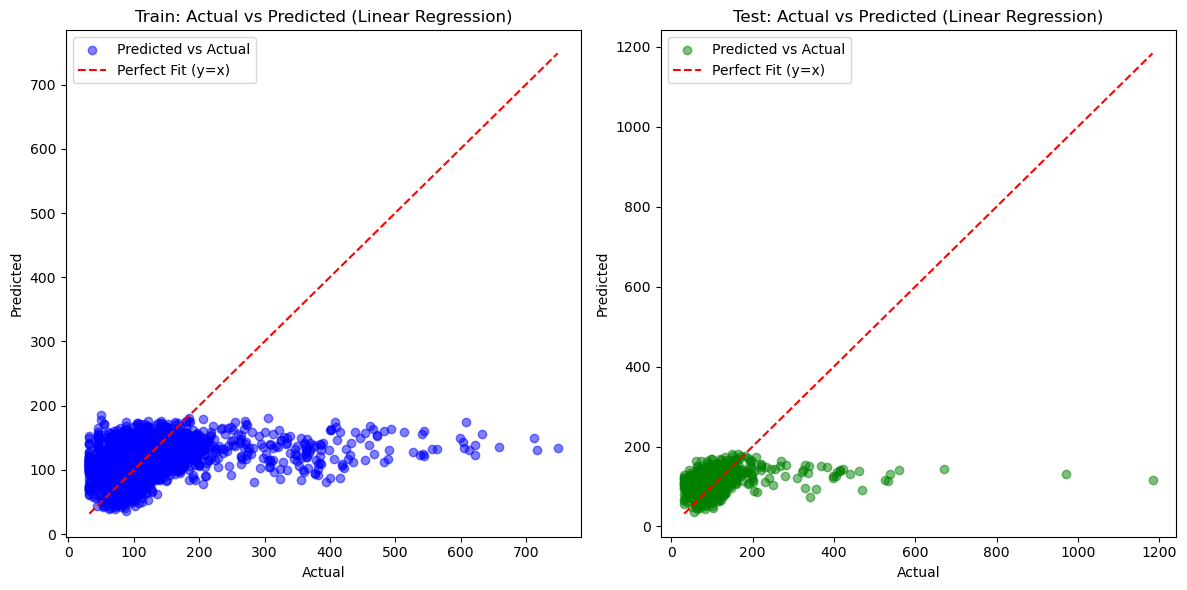

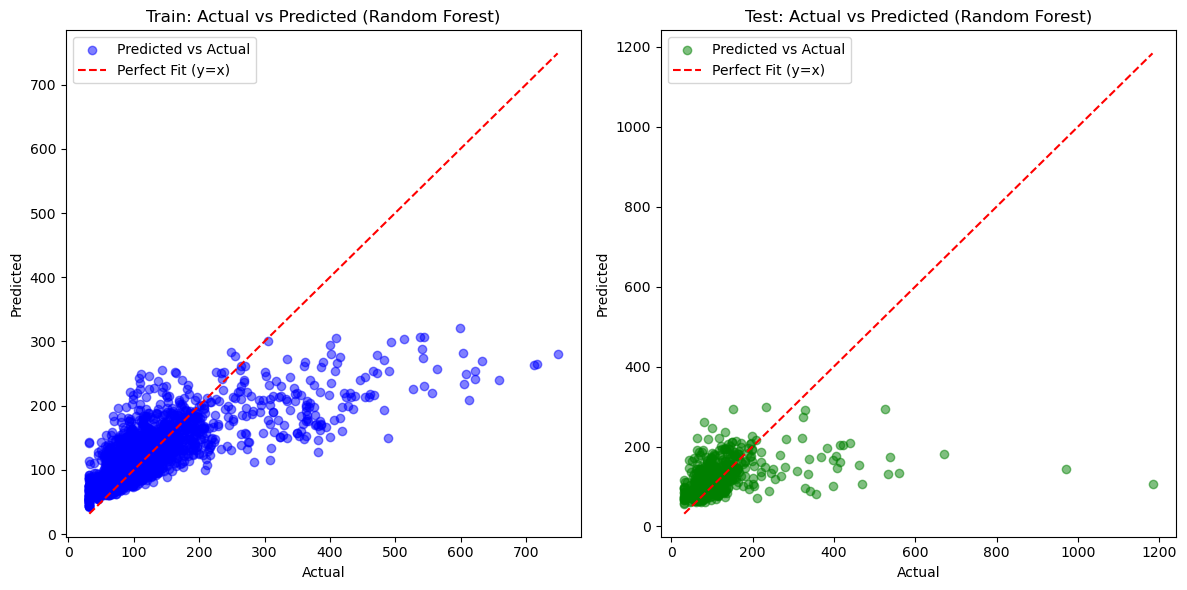

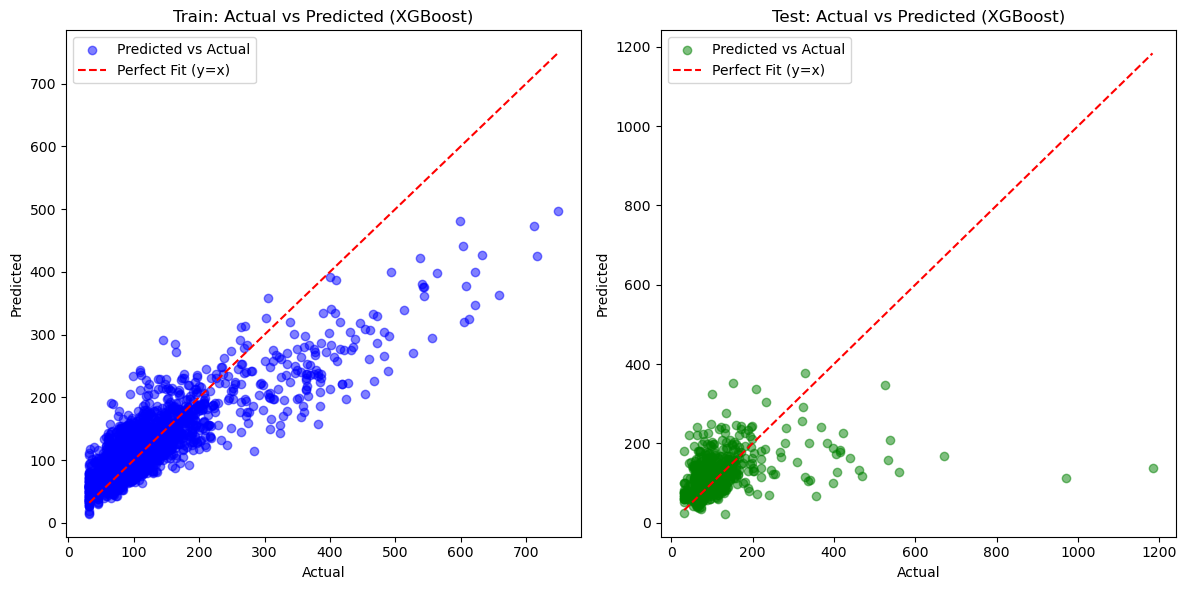

,Model,Train_MAE,Train_MAPE (%),Train_R2,Test_MAE,Test_MAPE (%),Test_R2
0,Linear Regression,45.956709,46.358119,0.113228,45.003622,44.558310,0.085611
1,Random Forest,29.900536,27.608226,0.541947,39.886032,37.467125,0.174168
2,XGBoost,25.928017,24.680968,0.718747,42.992511,40.765221,0.129647


In [65]:
feature_columns = ['month', 'day_name','hour','time_of_day','is_weekend','temp','wdir','wspd']
target = 'mains'

# Prepare the data
X_train, y_train, X_test, y_test = prepare_data(df_hourly, target_column=target, feature_columns=feature_columns)

# Evaluate models and display the results
results = evaluate_models(X_train, y_train, X_test, y_test)
display(results)


### Stacking Model (No Tuning)

In [52]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.ensemble import StackingRegressor
from sklearn.metrics import make_scorer, mean_absolute_error, r2_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Global settings
max_iter = 20  # Maximum number of iterations for RandomizedSearchCV
cv_folds = 5  # Number of cross-validation folds

# Function to calculate Mean Absolute Percentage Error (MAPE)
def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

# Function to plot actual vs predicted values for both train and test sets
def plot_train_vs_test(y_train, y_train_pred, y_test, y_test_pred, model_name):
    plt.figure(figsize=(12, 6))

    # Plot for training set
    plt.subplot(1, 2, 1)
    plt.scatter(y_train, y_train_pred, alpha=0.5, color="blue", label="Predicted vs Actual")
    plt.plot([min(y_train), max(y_train)], [min(y_train), max(y_train)], color="red", linestyle="--", label="Perfect Fit (y=x)")
    plt.xlabel("Actual")
    plt.ylabel("Predicted")
    plt.title(f"Train: Actual vs Predicted ({model_name})")
    plt.legend()

    # Plot for test set
    plt.subplot(1, 2, 2)
    plt.scatter(y_test, y_test_pred, alpha=0.5, color="green", label="Predicted vs Actual")
    plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color="red", linestyle="--", label="Perfect Fit (y=x)")
    plt.xlabel("Actual")
    plt.ylabel("Predicted")
    plt.title(f"Test: Actual vs Predicted ({model_name})")
    plt.legend()

    plt.tight_layout()
    plt.show()

# Function to prepare the data with preprocessing (OneHotEncoding, Scaling)
def prepare_data(df, target_column, feature_columns=None):
    # Prepare the features (X) and target (y)
    X = df[feature_columns]
    y = df[target_column].values

    # Define categorical and numerical columns
    categorical_cols = X.select_dtypes(include=['object', 'category']).columns.tolist()
    numerical_cols = X.select_dtypes(include=['number']).columns.tolist()

    # Create a preprocessor pipeline
    preprocessor = ColumnTransformer(
        transformers=[
            ('num', StandardScaler(), numerical_cols),   # Scale numerical features
            ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols)   # One-hot encode categorical features, ignoring unknown categories
        ]
    )

    # Apply transformations to the features
    X_preprocessed = preprocessor.fit_transform(X)

    # Split the data randomly into train (80%) and test (20%) sets
    X_train, X_test, y_train, y_test = train_test_split(X_preprocessed, y, test_size=0.2, random_state=42)

    return X_train, y_train, X_test, y_test

# Function to evaluate the stacking model
def evaluate_stacking_model(X_train, y_train, X_test, y_test):
    # Initialize base and meta learners
    base_model = ('linear', LinearRegression())
    meta_learners = [
        ('rf', RandomForestRegressor(random_state=42)),
        ('xgb', XGBRegressor(random_state=42))
    ]

    # Create a stacking regressor using Linear Regression as base model and RandomForest, XGBoost as meta learners
    stacking_model = StackingRegressor(
        estimators=meta_learners,
        final_estimator=LinearRegression(),  # You can change this to any other model, such as Ridge, Lasso, etc.
        cv=cv_folds
    )

    # Train the stacking model
    stacking_model.fit(X_train, y_train)

    # Predict on train and test sets
    y_train_pred = stacking_model.predict(X_train)
    y_test_pred = stacking_model.predict(X_test)

    # Plot actual vs predicted for both train and test sets
    plot_train_vs_test(y_train, y_train_pred, y_test, y_test_pred, "Stacking Model")

    # Calculate evaluation metrics for train set
    mae_train = mean_absolute_error(y_train, y_train_pred)
    mape_train = mean_absolute_percentage_error(y_train, y_train_pred)
    r2_train = r2_score(y_train, y_train_pred)

    # Calculate evaluation metrics for test set
    mae_test = mean_absolute_error(y_test, y_test_pred)
    mape_test = mean_absolute_percentage_error(y_test, y_test_pred)
    r2_test = r2_score(y_test, y_test_pred)

    # Create a dictionary to store results
    results = {
        'Train_MAE': mae_train,
        'Train_MAPE (%)': mape_train,
        'Train_R2': r2_train,
        'Test_MAE': mae_test,
        'Test_MAPE (%)': mape_test,
        'Test_R2': r2_test
    }

    # Return results
    return pd.DataFrame([results])


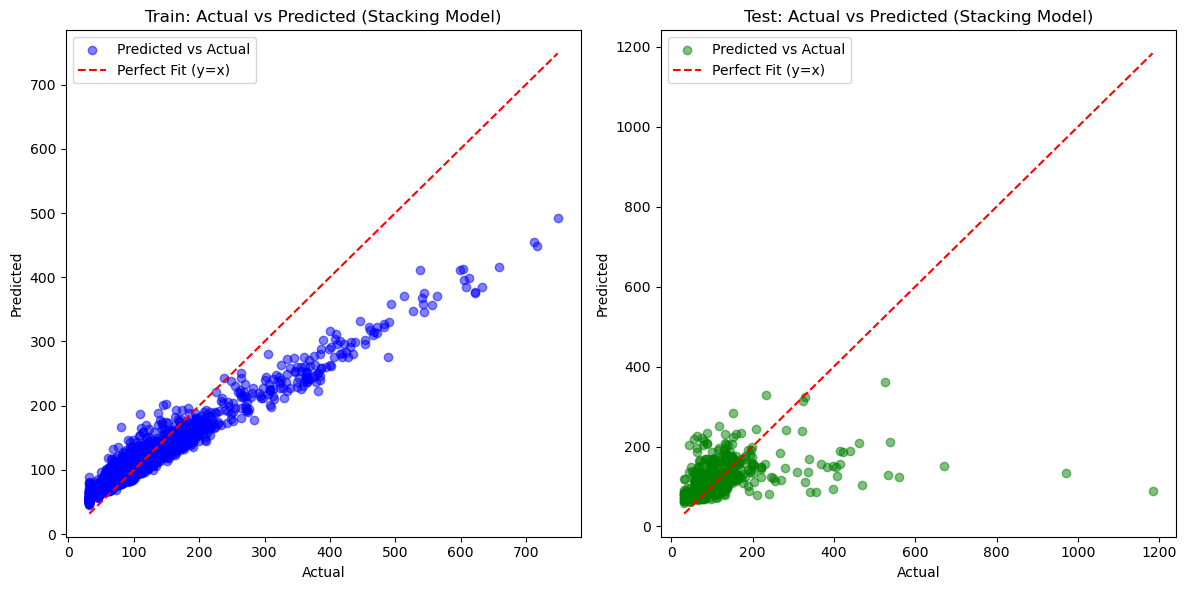

,Train_MAE,Train_MAPE (%),Train_R2,Test_MAE,Test_MAPE (%),Test_R2
0,19.625215,18.552045,0.817668,39.728265,37.284114,0.158479


In [53]:

feature_columns = ['month', 'day_name','hour','time_of_day','is_weekend','temp','wdir','wspd']
target = 'mains'

# Prepare the data
X_train, y_train, X_test, y_test = prepare_data(df_hourly, target, feature_columns)

# Evaluate the stacking model
results = evaluate_stacking_model(X_train, y_train, X_test, y_test)
display(results)


## Stacking model (Tuning)

In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.ensemble import StackingRegressor
from sklearn.metrics import make_scorer, mean_absolute_error, r2_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Global settings
max_iter = 20  # Maximum number of iterations for RandomizedSearchCV
cv_folds = 5  # Number of cross-validation folds

# Function to calculate Mean Absolute Percentage Error (MAPE)
def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

# Define MAPE scorer for RandomizedSearchCV
mape_scorer = make_scorer(mean_absolute_percentage_error, greater_is_better=False)

# Function to plot actual vs predicted values for both train and test sets
def plot_train_vs_test(y_train, y_train_pred, y_test, y_test_pred, model_name):
    plt.figure(figsize=(12, 6))

    # Plot for training set
    plt.subplot(1, 2, 1)
    plt.scatter(y_train, y_train_pred, alpha=0.5, color="blue", label="Predicted vs Actual")
    plt.plot([min(y_train), max(y_train)], [min(y_train), max(y_train)], color="red", linestyle="--", label="Perfect Fit (y=x)")
    plt.xlabel("Actual")
    plt.ylabel("Predicted")
    plt.title(f"Train: Actual vs Predicted ({model_name})")
    plt.legend()

    # Plot for test set
    plt.subplot(1, 2, 2)
    plt.scatter(y_test, y_test_pred, alpha=0.5, color="green", label="Predicted vs Actual")
    plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color="red", linestyle="--", label="Perfect Fit (y=x)")
    plt.xlabel("Actual")
    plt.ylabel("Predicted")
    plt.title(f"Test: Actual vs Predicted ({model_name})")
    plt.legend()

    plt.tight_layout()
    plt.show()

# Function to prepare the data with preprocessing (OneHotEncoding, Scaling)
def prepare_data(df, target_column, feature_columns=None):
    # Prepare the features (X) and target (y)
    X = df[feature_columns]
    y = df[target_column].values

    # Define categorical and numerical columns
    categorical_cols = X.select_dtypes(include=['object', 'category']).columns.tolist()
    numerical_cols = X.select_dtypes(include=['number']).columns.tolist()

    # Create a preprocessor pipeline
    preprocessor = ColumnTransformer(
        transformers=[
            ('num', StandardScaler(), numerical_cols),   # Scale numerical features
            ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols)   # One-hot encode categorical features, ignoring unknown categories
        ]
    )

    # Apply transformations to the features
    X_preprocessed = preprocessor.fit_transform(X)

    # Split the data randomly into train (80%) and test (20%) sets
    X_train, X_test, y_train, y_test = train_test_split(X_preprocessed, y, test_size=0.2, random_state=42)

    return X_train, y_train, X_test, y_test

# Function to evaluate the stacking model
def evaluate_stacking_model(X_train, y_train, X_test, y_test):
    # Define hyperparameter search space for RandomForest
    rf_params = {
        'n_estimators': [50, 100, 200, 300],
        'max_depth': [5, 10, 20, 30],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 5]
    }

    # Define hyperparameter search space for XGBoost
    xgb_params = {
        'n_estimators': [50, 100, 200, 300],
        'max_depth': [3, 5, 7, 10],
        'learning_rate': [0.01, 0.1, 0.3],
        'min_child_weight': [1, 5, 10],
        'subsample': [0.5, 0.7, 1.0],
        'colsample_bytree': [0.5, 0.7, 1.0]
    }

    # Base models
    rf = RandomForestRegressor(random_state=42)
    xgb = XGBRegressor(random_state=42)

    # Tune RandomForest using RandomizedSearchCV
    rf_search = RandomizedSearchCV(rf, rf_params, n_iter=max_iter, cv=cv_folds, random_state=42, scoring='r2', n_jobs=-1)
    rf_search.fit(X_train, y_train)
    best_rf = rf_search.best_estimator_

    # Tune XGBoost using RandomizedSearchCV
    xgb_search = RandomizedSearchCV(xgb, xgb_params, n_iter=max_iter, cv=cv_folds, random_state=42, scoring='r2', n_jobs=-1)
    xgb_search.fit(X_train, y_train)
    best_xgb = xgb_search.best_estimator_

    # Create a stacking regressor using Linear Regression as final estimator and tuned RandomForest, XGBoost as base models
    stacking_model = StackingRegressor(
        estimators=[
            ('rf', best_rf),
            ('xgb', best_xgb)
        ],
        final_estimator=LinearRegression(),  # You can change this to any other model
        cv=cv_folds
    )

    # Train the stacking model
    stacking_model.fit(X_train, y_train)

    # Predict on train and test sets
    y_train_pred = stacking_model.predict(X_train)
    y_test_pred = stacking_model.predict(X_test)

    # Plot actual vs predicted for both train and test sets
    plot_train_vs_test(y_train, y_train_pred, y_test, y_test_pred, "Stacking Model with RF & XGBoost")

    # Calculate evaluation metrics for train set
    mae_train = mean_absolute_error(y_train, y_train_pred)
    mape_train = mean_absolute_percentage_error(y_train, y_train_pred)
    r2_train = r2_score(y_train, y_train_pred)

    # Calculate evaluation metrics for test set
    mae_test = mean_absolute_error(y_test, y_test_pred)
    mape_test = mean_absolute_percentage_error(y_test, y_test_pred)
    r2_test = r2_score(y_test, y_test_pred)

    # Create a dictionary to store results
    results = {
        'Train_MAE': mae_train,
        'Train_MAPE (%)': mape_train,
        'Train_R2': r2_train,
        'Test_MAE': mae_test,
        'Test_MAPE (%)': mape_test,
        'Test_R2': r2_test
    }

    # Return results
    return pd.DataFrame([results])


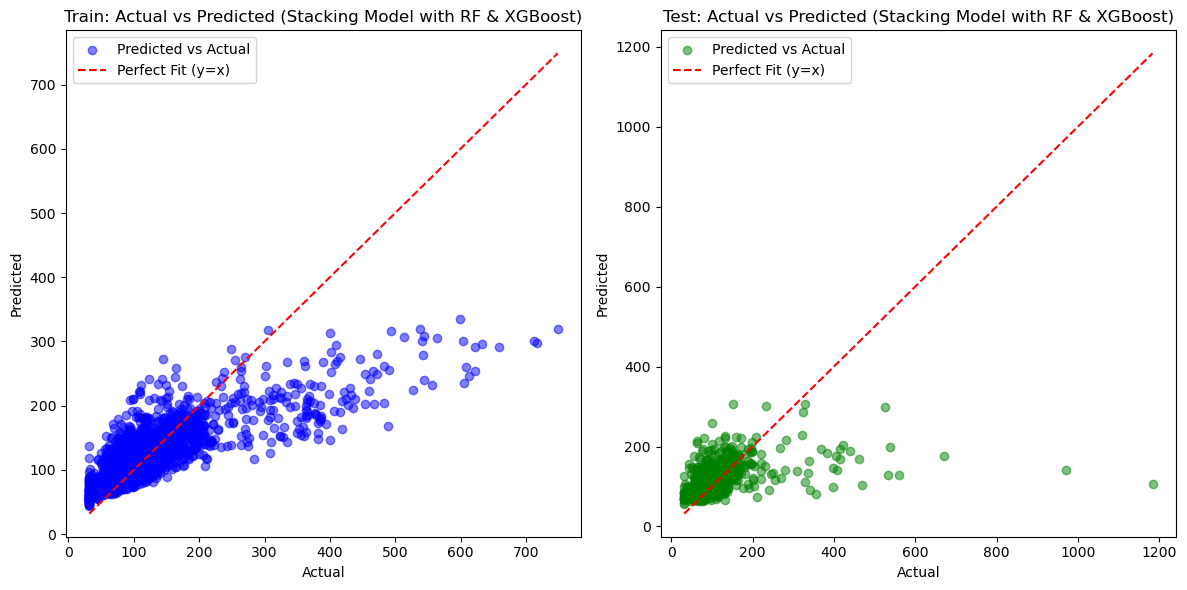

,Train_MAE,Train_MAPE (%),Train_R2,Test_MAE,Test_MAPE (%),Test_R2
0,28.778082,26.557646,0.580172,39.540164,37.025563,0.179061


In [45]:

feature_columns = ['month', 'day_name','hour','time_of_day','is_weekend','temp','wdir','wspd']
target = 'mains'

# Prepare the data
X_train, y_train, X_test, y_test = prepare_data(df_hourly, target, feature_columns)

# Evaluate the stacking model
results = evaluate_stacking_model(X_train, y_train, X_test, y_test)
display(results)
